In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display

# to play the audio files
from IPython.display import Audio


from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from collections.abc import Iterable

from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, BatchNormalization
from keras import layers, callbacks

Matplotlib is building the font cache; this may take a moment.


* **[Table of Content](#0)**

<a id="3"></a>
# <p style="padding:10px;background-color:#0C4C79 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Import Dataset </p>

In [ ]:
Root_dir = '/Users/chinmaychaudhari/Desktop/Hack2skill/model'

In [ ]:
Crema_path = Root_dir + "/dataset/" 
# Ravdess_path = Root_dir + "/Ravdess/audio_speech_actors_01-24/"
# Savee_path = Root_dir + "/Savee/"
# Tess_path = Root_dir + "/Tess/"

In [ ]:
Crema_dir_list = os.listdir(Crema_path)
# Ravdess_dir_list = os.listdir(Ravdess_path)
# Savee_dir_list = os.listdir(Savee_path)
# Tess_dir_list = os.listdir(Tess_path)

* **[Table of Content](#0)**

# Crema

In [ ]:
Ex_Crema_dir_list = Crema_dir_list[:15]
Ex_Crema_dir_list

['1022_ITS_ANG_XX.wav',
 '1037_ITS_ANG_XX.wav',
 '1060_ITS_NEU_XX.wav',
 '1075_ITS_NEU_XX.wav',
 '1073_IOM_DIS_XX.wav',
 '1066_IOM_DIS_XX.wav',
 '1078_IWL_SAD_XX.wav',
 '1029_TAI_FEA_XX.wav',
 '1039_IEO_SAD_MD.wav',
 '1008_TAI_HAP_XX.wav',
 '1018_TSI_FEA_XX.wav',
 '1028_IEO_SAD_HI.wav',
 '1039_TSI_HAP_XX.wav',
 '1064_ITS_HAP_XX.wav',
 '1071_ITS_HAP_XX.wav']

In [ ]:
emotions_crema = []
paths_crema = []

for it in Crema_dir_list:
    # storing file paths
    paths_crema.append(Crema_path + it)
    # storing file emotions
    part = it.split('_')
    if part[2] == 'SAD':
        emotions_crema.append('sad')
    elif part[2] == 'ANG':
        emotions_crema.append('angry')
    elif part[2] == 'DIS':
        emotions_crema.append('disgust')
    elif part[2] == 'FEA':
        emotions_crema.append('fear')
    elif part[2] == 'HAP':
        emotions_crema.append('happy')
    elif part[2] == 'NEU':
        emotions_crema.append('neutral')
    else:
        emotions_crema.append('Unknown')
        
# dataframe for emotion of files
emotions_crema_df = pd.DataFrame(emotions_crema, columns=['Emotions'])

# dataframe for path of files.
path_crema_df = pd.DataFrame(paths_crema, columns=['Path'])
Crema_df = pd.concat([emotions_crema_df, path_crema_df], axis=1)
print(Crema_df.shape)
print(Crema_df)
Crema_df.head().style.set_properties(**{'background-color': '#9490ff',
                           'color': 'black',
                           'border-color': 'black'})


(7442, 2)
     Emotions                                               Path
0       angry  /Users/chinmaychaudhari/Desktop/Hack2skill/mod...
1       angry  /Users/chinmaychaudhari/Desktop/Hack2skill/mod...
2     neutral  /Users/chinmaychaudhari/Desktop/Hack2skill/mod...
3     neutral  /Users/chinmaychaudhari/Desktop/Hack2skill/mod...
4     disgust  /Users/chinmaychaudhari/Desktop/Hack2skill/mod...
...       ...                                                ...
7437    angry  /Users/chinmaychaudhari/Desktop/Hack2skill/mod...
7438    angry  /Users/chinmaychaudhari/Desktop/Hack2skill/mod...
7439    angry  /Users/chinmaychaudhari/Desktop/Hack2skill/mod...
7440    angry  /Users/chinmaychaudhari/Desktop/Hack2skill/mod...
7441  neutral  /Users/chinmaychaudhari/Desktop/Hack2skill/mod...

[7442 rows x 2 columns]


In [ ]:
[Crema_df["Emotions"].unique().tolist() for i in Crema_df.columns]

[['angry', 'neutral', 'disgust', 'sad', 'fear', 'happy'],
 ['angry', 'neutral', 'disgust', 'sad', 'fear', 'happy']]

In [ ]:
font1 = {'family':'Times New Roman','color':'blue','size':30}
font2 = {'family':'Times New Roman','color':'blue','size':20}
font3 = {'family':'Times New Roman','color':'blue','size':10}

* **[Table of Content](#0)**

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **2- Plot the details of each dataset**

  - We can see the number of samples of each classes. Also we can consider the balance of the 
    datasets.


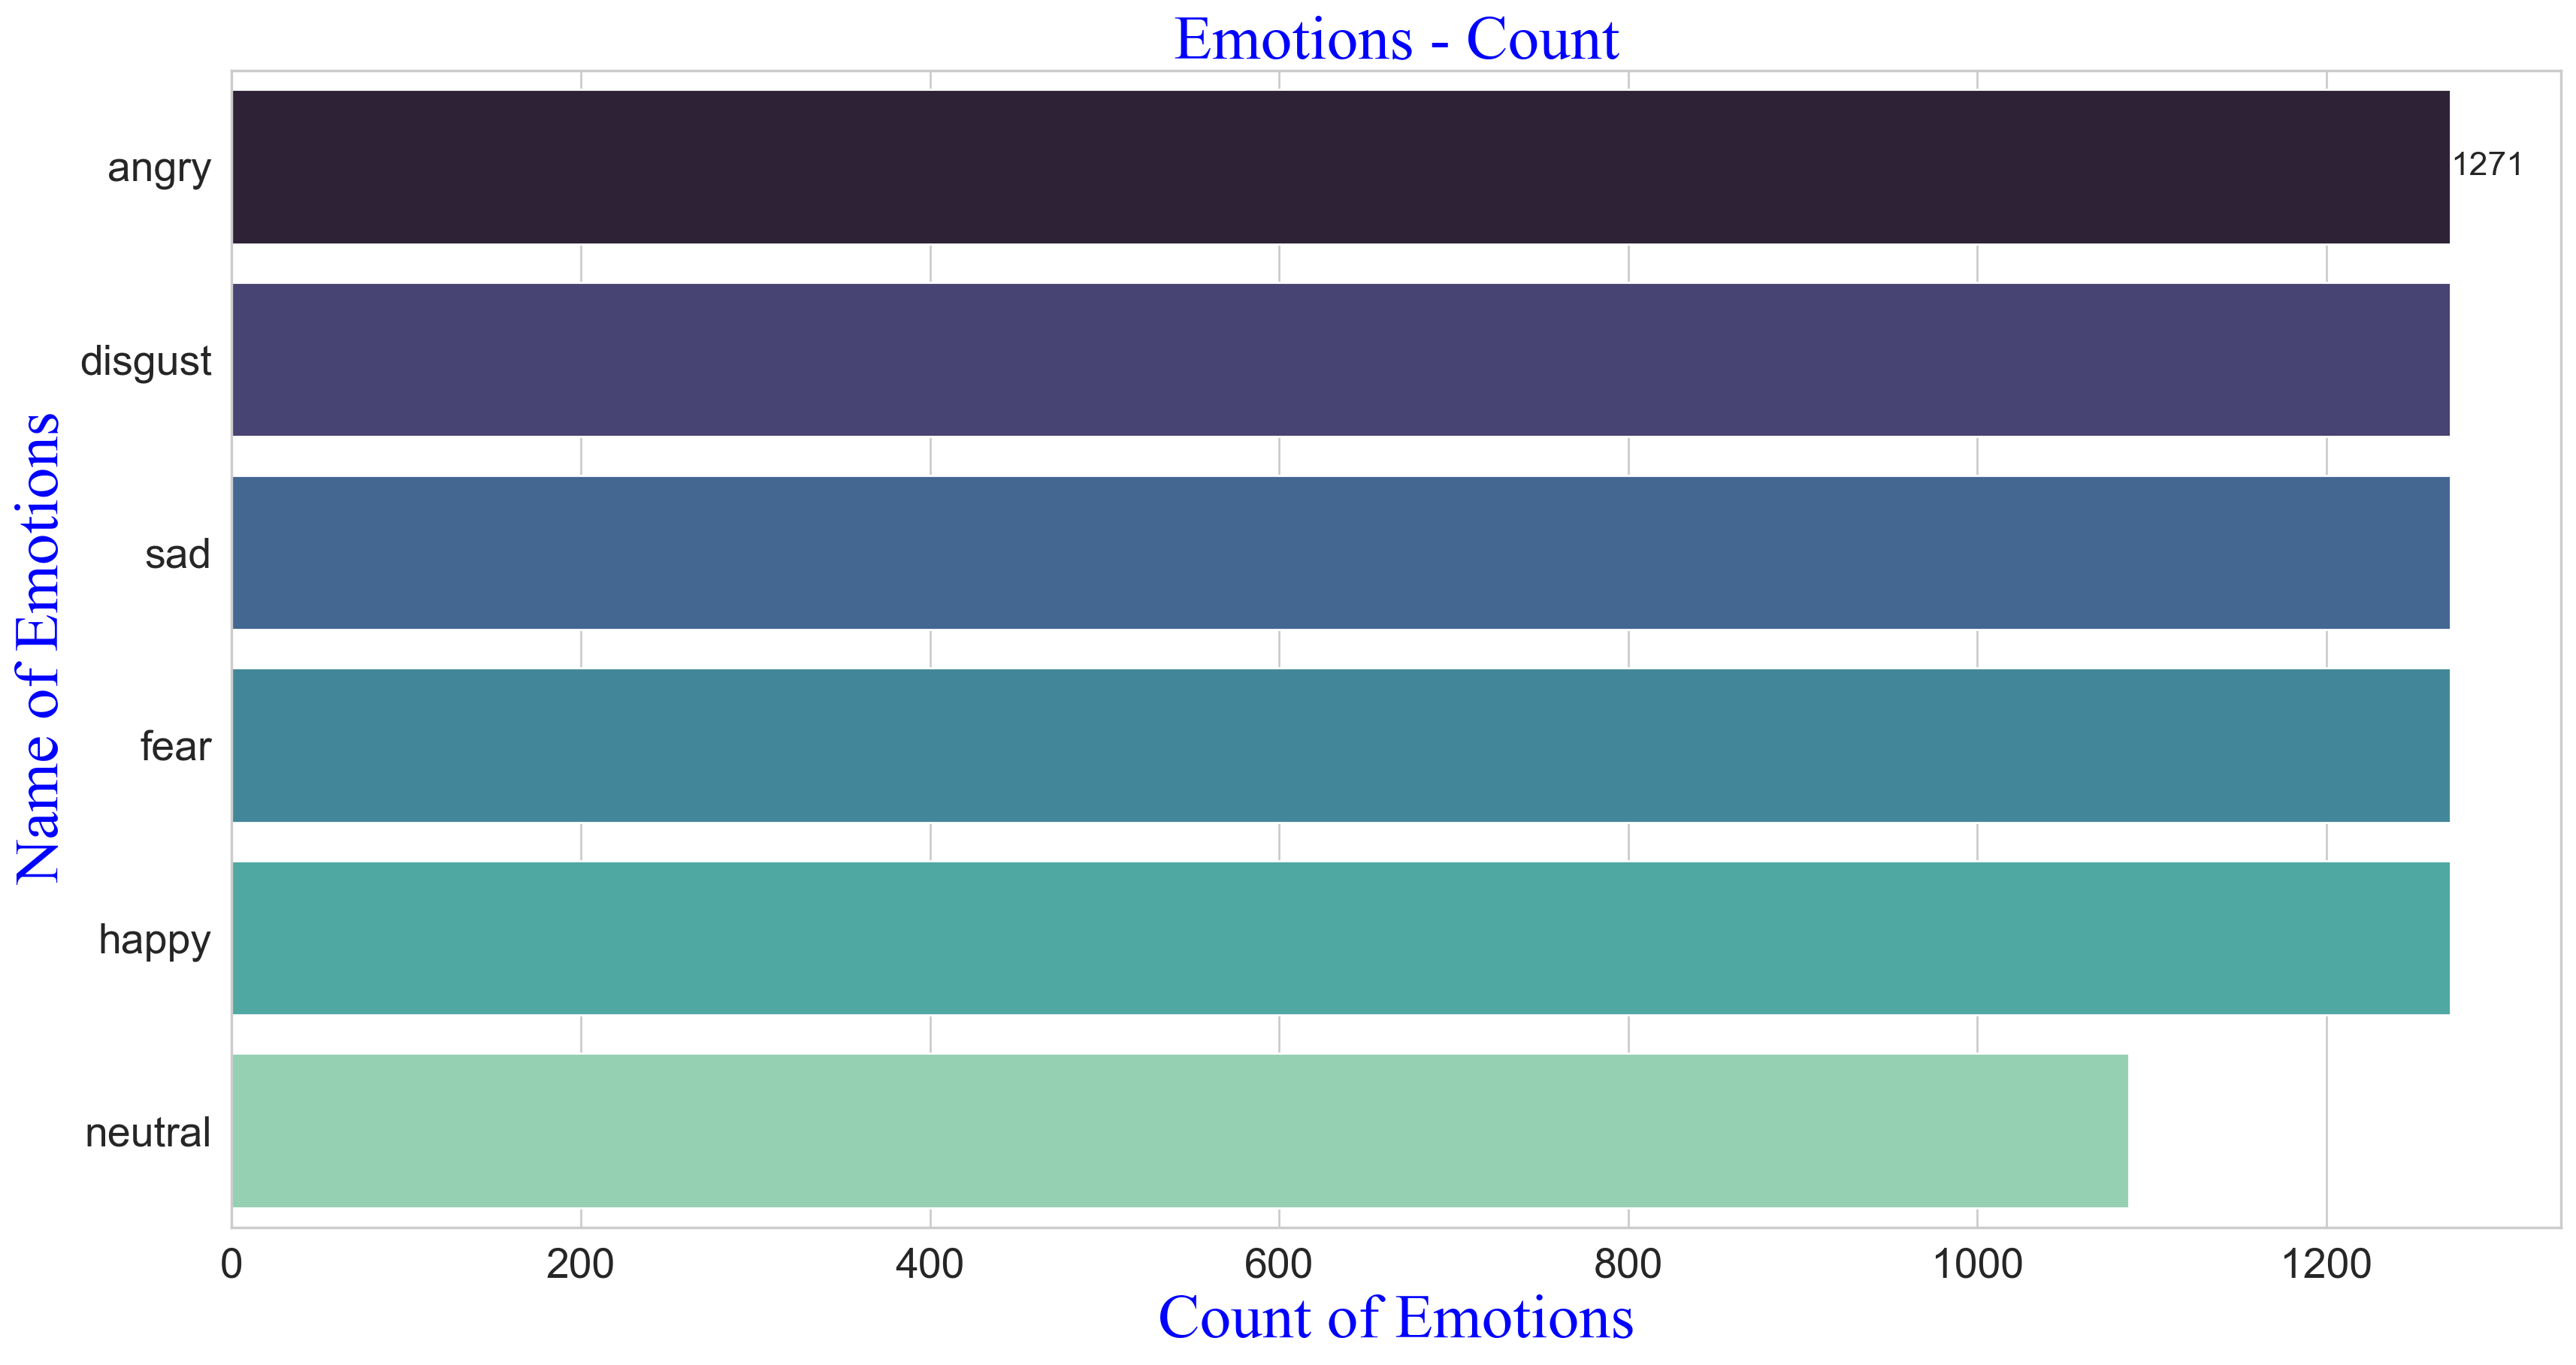

In [ ]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Crema_df['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="mako")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions", fontdict= font1)
plt.xlabel("Count of Emotions", fontdict= font1)
plt.title("Emotions - Count", fontdict= font1)
plt.show()

# Ravdess

In [ ]:
# Ex_Ravdess_dir_list = Ravdess_dir_list[:15]
# Ex_Ravdess_dir_list

That's not enough


In [ ]:
# emotions_ravdess = []
# path_ravdess = []

# for it in Ravdess_dir_list:
#     # There are 20 actors  
#     actor = os.listdir(Ravdess_path + it)
#     for file in actor:
#         part = file.split('.')[0]
#         part = part.split('-')
#         # third part in each file represents the emotion associated to that file.
#         emotions_ravdess.append(int(part[2]))
#         path_ravdess.append(Ravdess_path + it + '/' + file)
    
    
# emotion_ravdess_df = pd.DataFrame(emotions_ravdess, columns=['Emotions'])

# path_ravdess_df = pd.DataFrame(path_ravdess, columns=['Path'])
# Ravdess_df = pd.concat([emotion_ravdess_df, path_ravdess_df], axis=1)

# # changing integers to actual emotions.
# Ravdess_df.Emotions.replace({1:'neutral', 2:'calm',
#                              3:'happy', 4:'sad', 5:'angry',
#                              6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
# Ravdess_df.head().style.set_properties(**{'background-color': '#9490ff',
#                            'color': 'black',
#                            'border-color': 'black'})

In [ ]:
# [Ravdess_df["Emotions"].unique().tolist() for i in Ravdess_df.columns]

[['surprise', 'neutral', 'disgust', 'fear', 'sad', 'calm', 'happy', 'angry'],
 ['surprise', 'neutral', 'disgust', 'fear', 'sad', 'calm', 'happy', 'angry']]

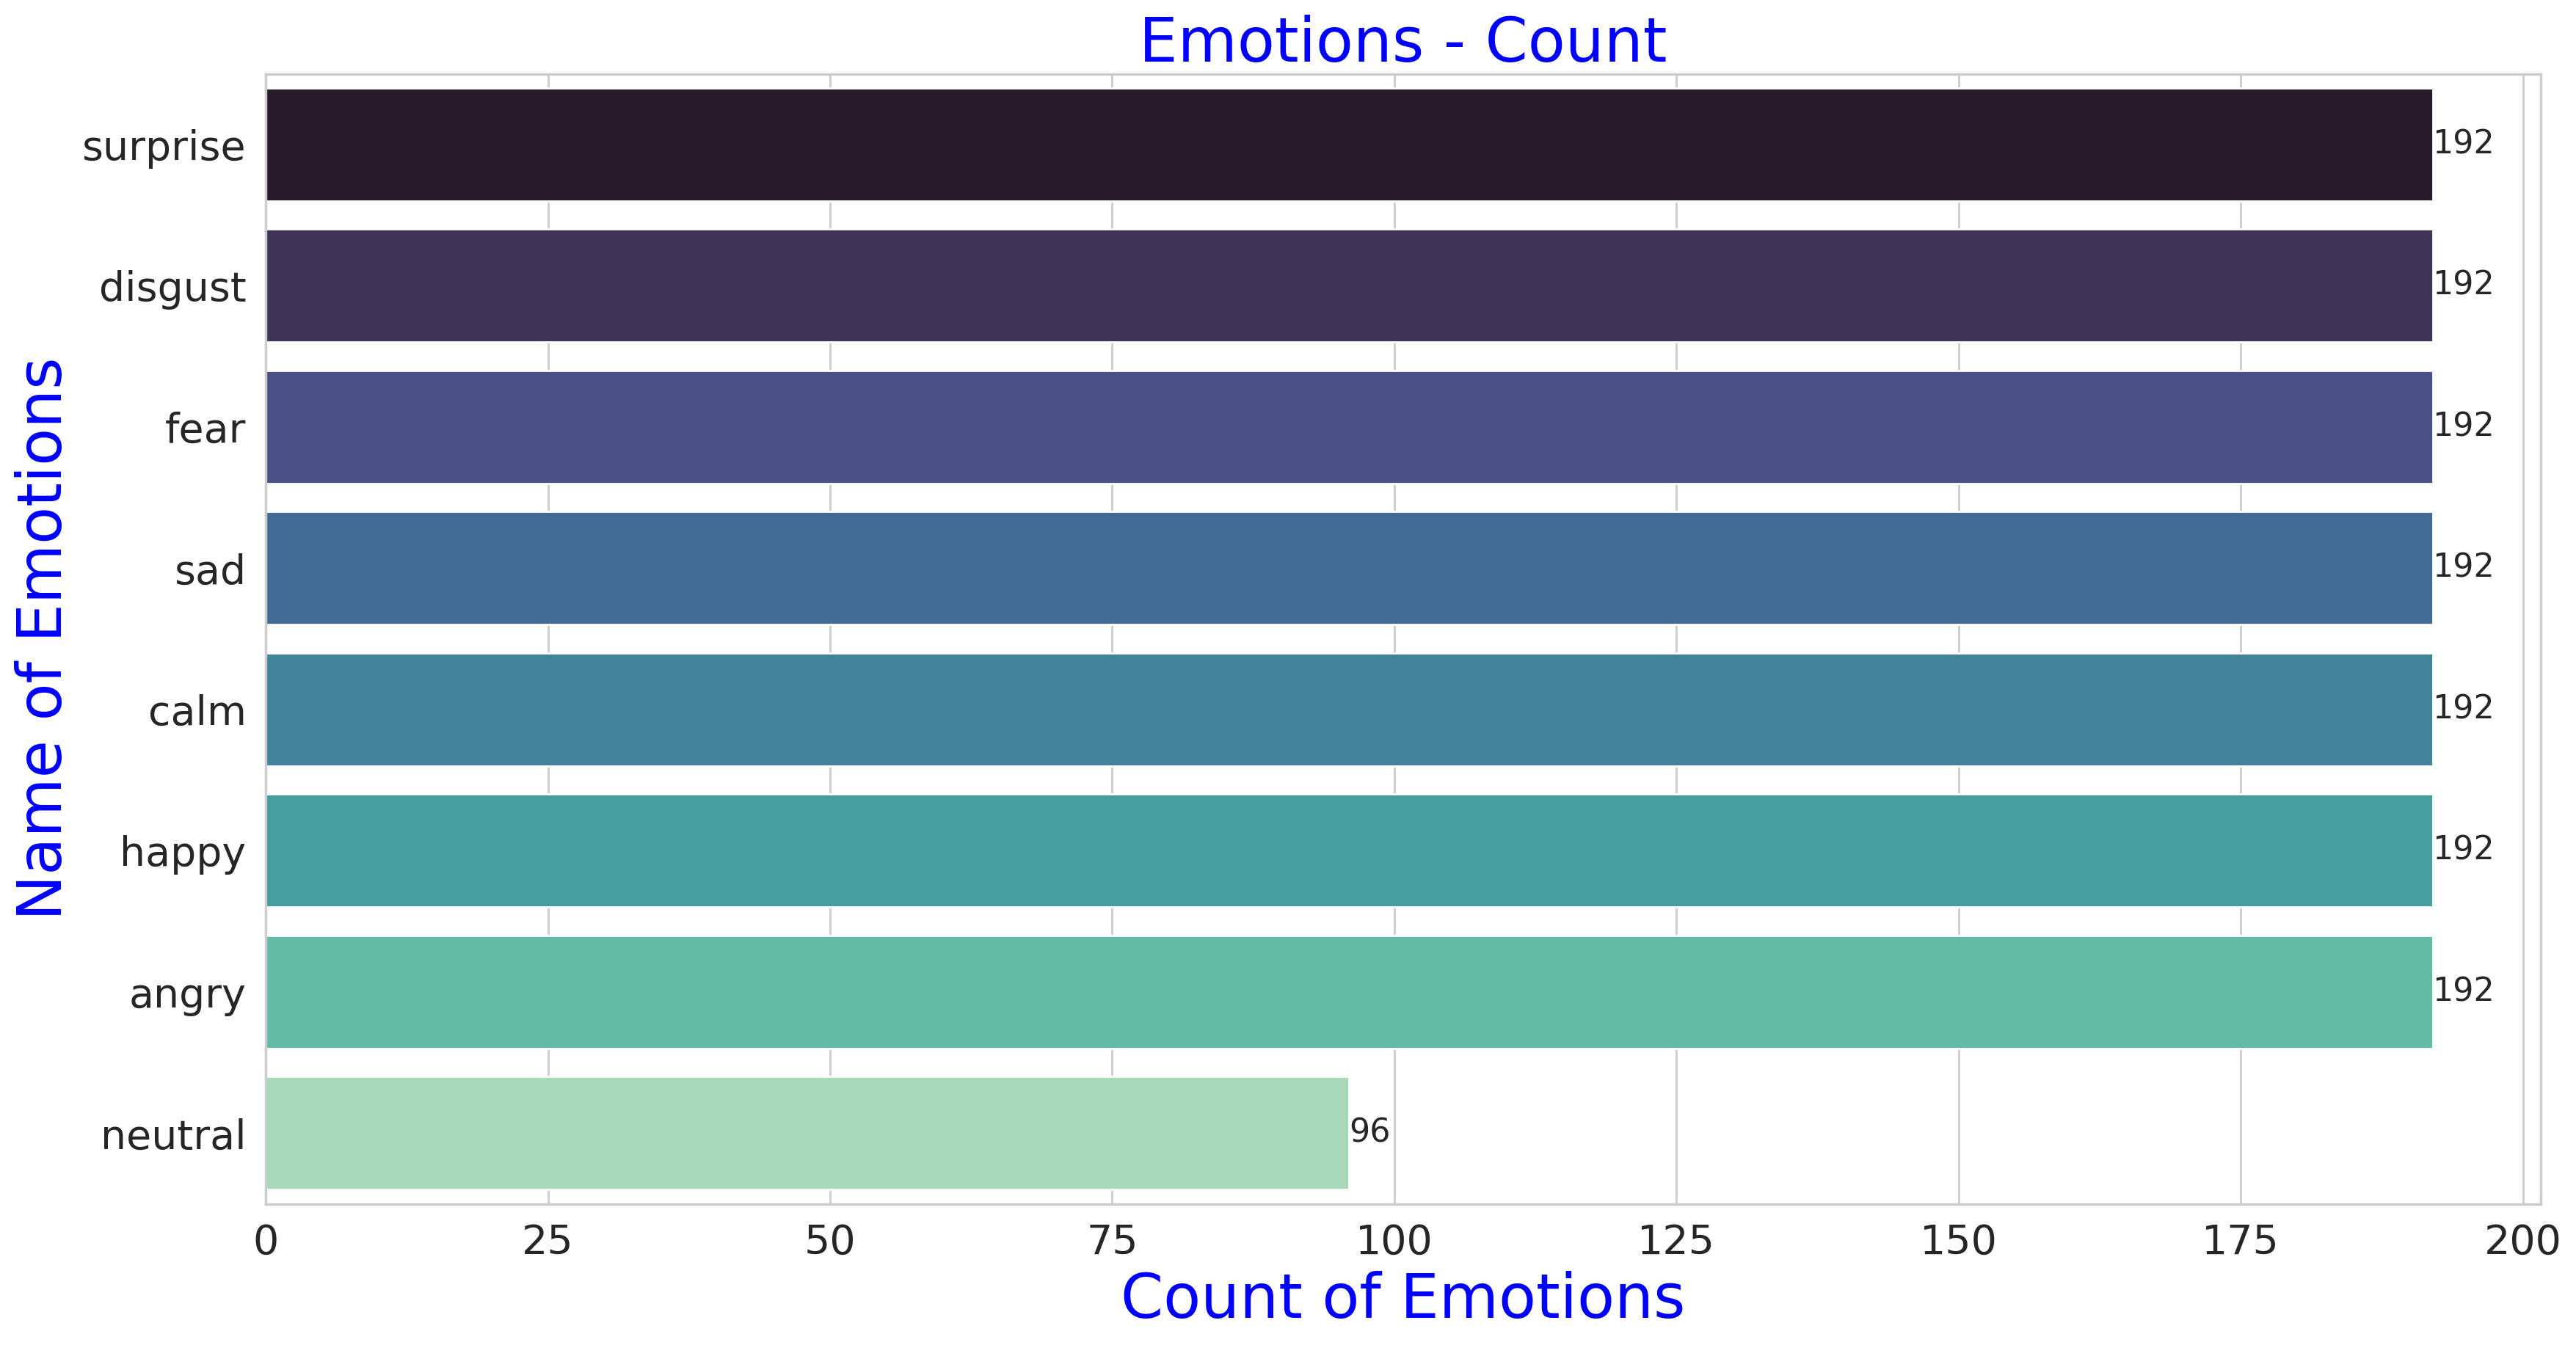

In [ ]:
# sns.set(style="whitegrid", color_codes=True)
# plt.figure(figsize=(20,10),dpi=200)
# Count_emotion = Ravdess_df['Emotions'].value_counts()[:]
# ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="mako")
# ax.bar_label(ax.containers[0],fontsize=16)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.ylabel("Name of Emotions", fontdict= font1)
# plt.xlabel("Count of Emotions", fontdict= font1)
# plt.title("Emotions - Count", fontdict= font1)
# plt.show()

# Savee

In [ ]:
# Ex_Savee_dir_list = Savee_dir_list[:15]
# Ex_Savee_dir_list

['JE_h09.wav',
 'KL_f12.wav',
 'DC_h03.wav',
 'DC_d04.wav',
 'KL_a14.wav',
 'JE_f01.wav',
 'KL_h15.wav',
 'JK_su02.wav',
 'JK_a06.wav',
 'DC_n01.wav',
 'DC_f01.wav',
 'JK_n22.wav',
 'KL_a10.wav',
 'JE_n08.wav',
 'KL_sa13.wav']

In [ ]:
# emotions_savee = []
# path_savee = []

# for it in Savee_dir_list:
#     path_savee.append(Savee_path + it)
#     part = it.split('_')[1]
#     part = part[:-6]
#     if part == 'a':
#         emotions_savee.append('angry')
#     elif part == 'd':
#         emotions_savee.append('disgust')
#     elif part == 'f':
#         emotions_savee.append('fear')
#     elif part == 'h':
#         emotions_savee.append('happiness')
#     elif part == 'n':
#         emotions_savee.append('neutral')
#     elif part == 'sa':
#         emotions_savee.append('sadness')
#     elif part == 'su':
#         emotions_savee.append('surprise')
        
#     else:
#         emotions_savee.append('Unknown')
        
# # dataframe for emotion of files
# emotion_savee_df = pd.DataFrame(emotions_savee, columns=['Emotions'])

# # dataframe for path of files.
# path_savee_df = pd.DataFrame(path_savee, columns=['Path'])
# Savee_df = pd.concat([emotion_savee_df, path_savee_df], axis=1)
# Savee_df.head().style.set_properties(**{'background-color': '#9490ff',
#                            'color': 'black',
#                            'border-color': 'black'})

In [ ]:
[Savee_df["Emotions"].unique().tolist() for i in Savee_df.columns]

[['happiness', 'fear', 'disgust', 'angry', 'surprise', 'neutral', 'sadness'],
 ['happiness', 'fear', 'disgust', 'angry', 'surprise', 'neutral', 'sadness']]

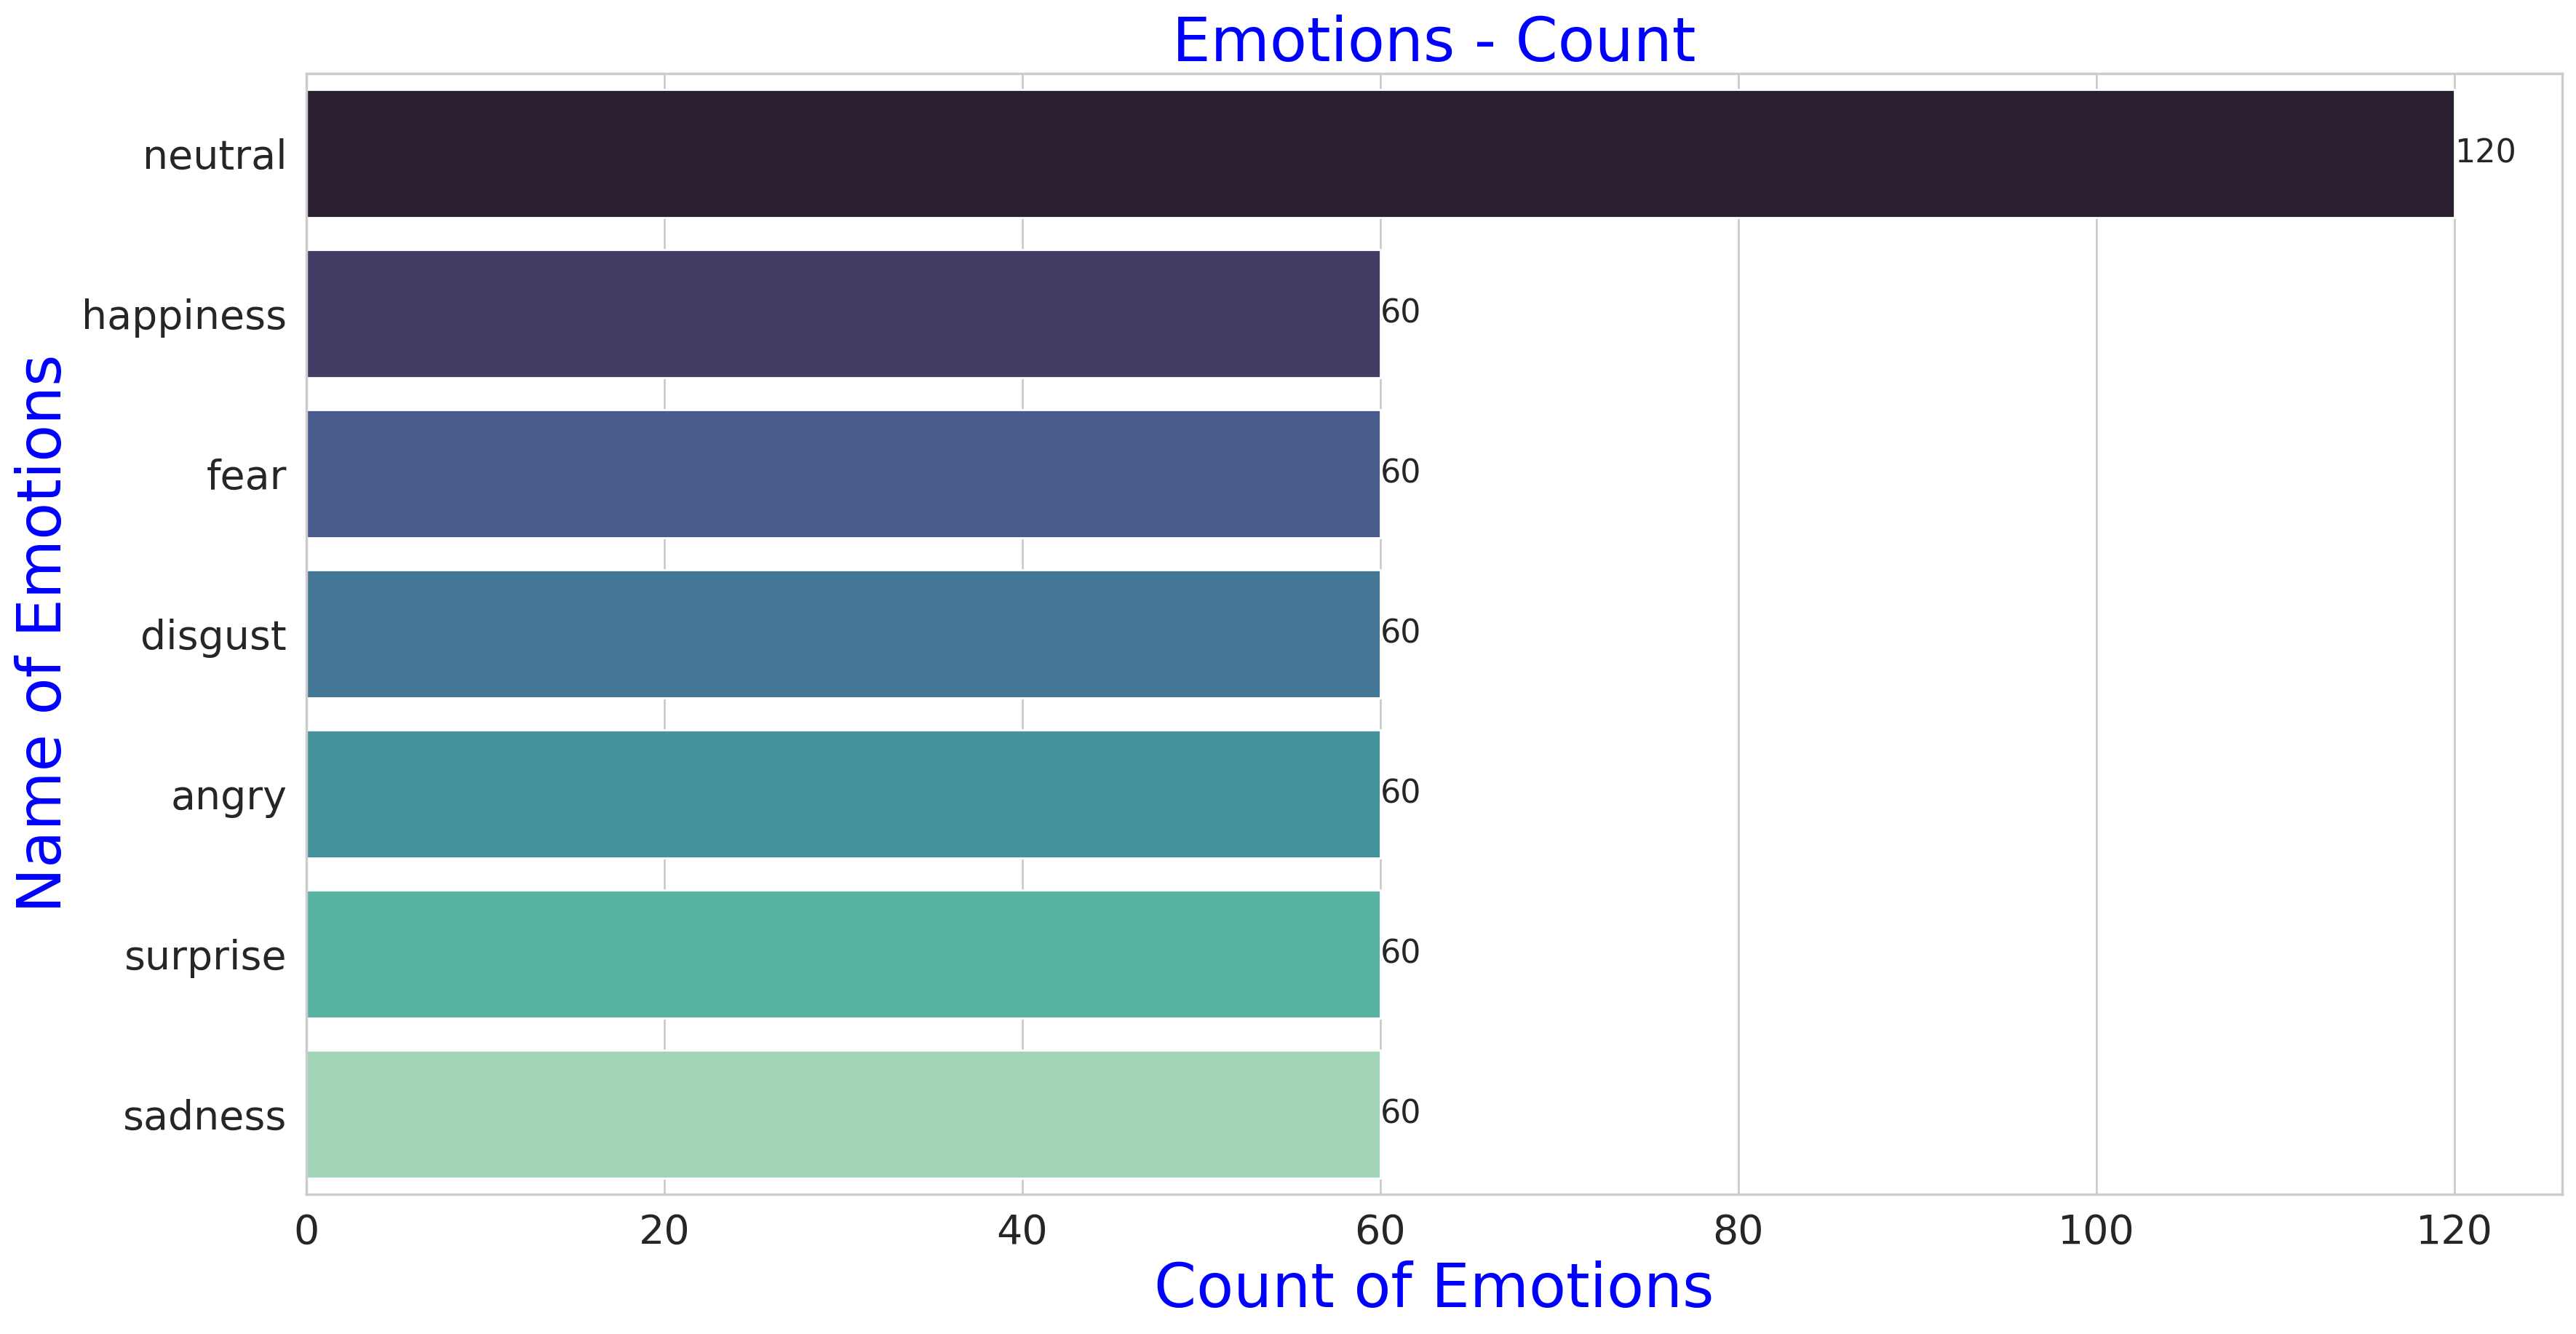

In [ ]:
# sns.set(style="whitegrid", color_codes=True)
# plt.figure(figsize=(20,10),dpi=200)
# Count_emotion = Savee_df['Emotions'].value_counts()[:]
# ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="mako")
# ax.bar_label(ax.containers[0],fontsize=16)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.ylabel("Name of Emotions", fontdict= font1)
# plt.xlabel("Count of Emotions", fontdict= font1)
# plt.title("Emotions - Count", fontdict= font1)
# plt.show()

In [ ]:
# Ex_Tess_dir_list = Tess_dir_list[:15]
# Ex_Tess_dir_list

['YAF_fear',
 'OAF_angry',
 'OAF_Fear',
 'OAF_disgust',
 'OAF_neutral',
 'YAF_angry',
 'OAF_Sad',
 'YAF_disgust',
 'YAF_neutral',
 'OAF_Pleasant_surprise',
 'YAF_happy',
 'OAF_happy',
 'YAF_sad',
 'YAF_pleasant_surprised']

# Tess

In [ ]:
# emotions_tess = []
# path_tess = []

# for it in Tess_dir_list:
#     directories = os.listdir(Tess_path + '/' + it)
#     for file in directories:
#         part = file.split('.')[0]
#         part = part.split('_')[2]
#         if part=='ps':
#             emotions_tess.append('surprise')
#         else:
#             emotions_tess.append(part)
#         path_tess.append(Tess_path + it + '/' + file)
        
        
        
# # dataframe for emotion of files
# emotion_tess_df = pd.DataFrame(emotions_tess, columns=['Emotions'])

# # dataframe for path of files.
# path_tess_df = pd.DataFrame(path_tess, columns=['Path'])
# Tess_df = pd.concat([emotion_tess_df, path_tess_df], axis=1)
# Tess_df.head().style.set_properties(**{'background-color': '#9490ff',
#                            'color': 'black',
#                            'border-color': 'black'})

In [ ]:
[Tess_df["Emotions"].unique().tolist() for i in Tess_df.columns]

[['fear', 'angry', 'disgust', 'neutral', 'sad', 'surprise', 'happy'],
 ['fear', 'angry', 'disgust', 'neutral', 'sad', 'surprise', 'happy']]

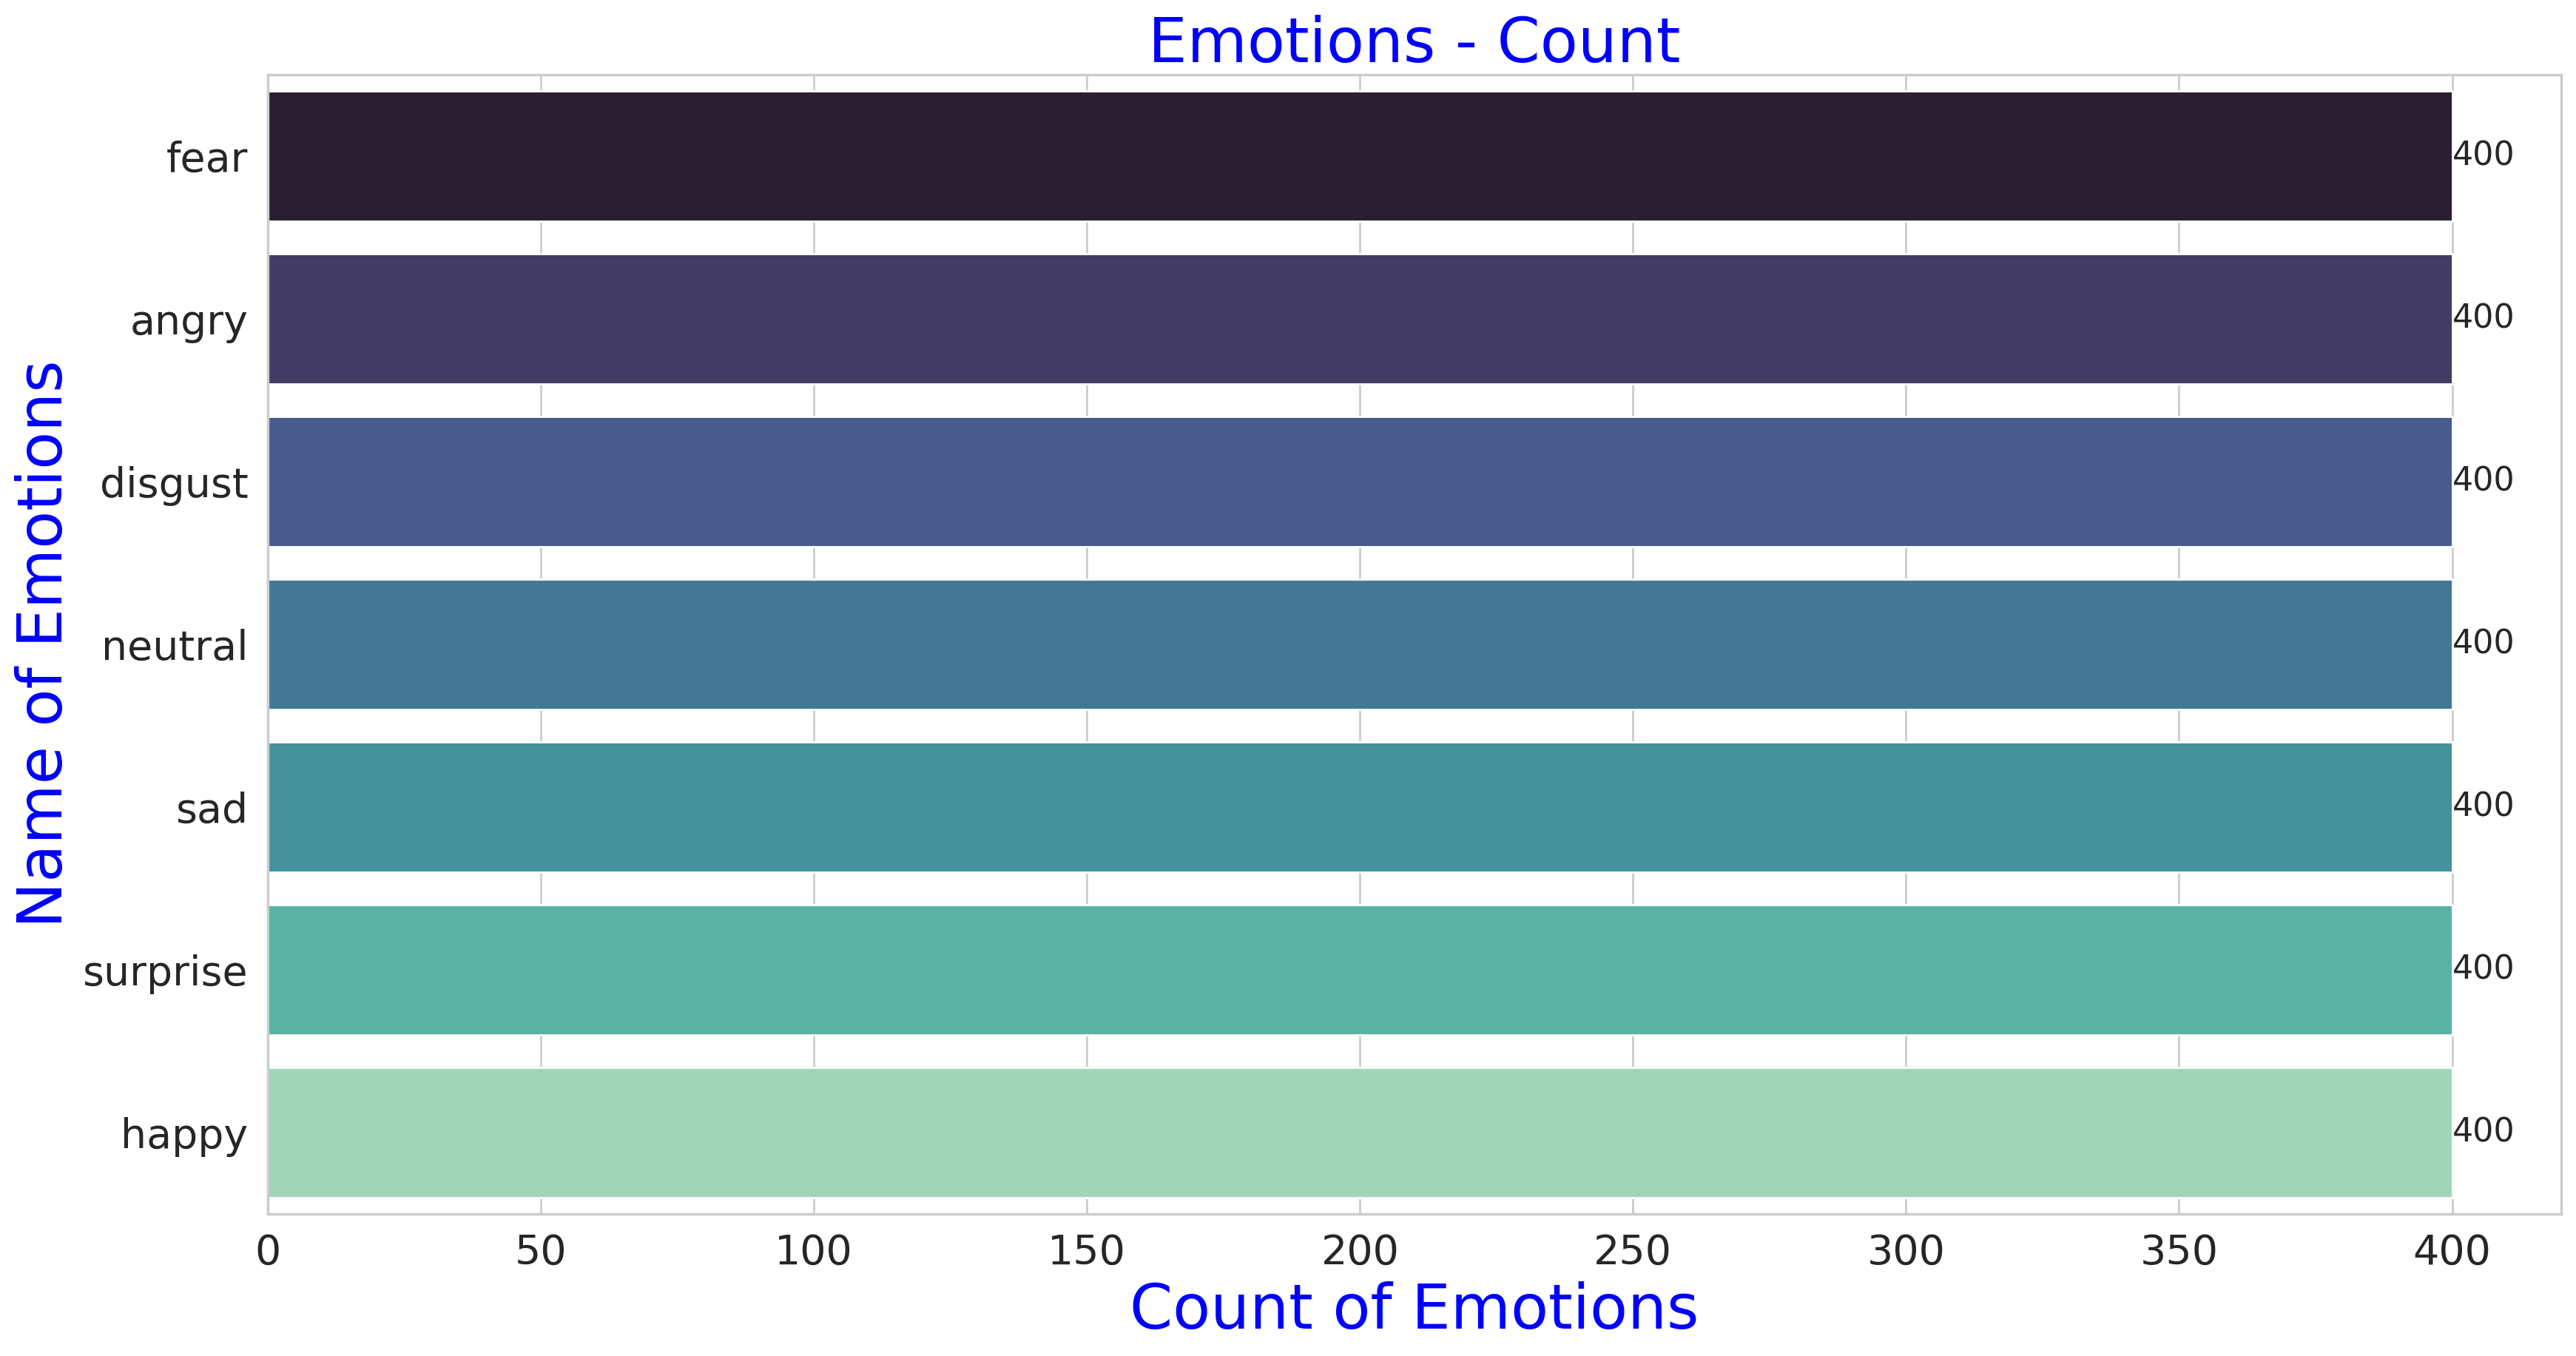

In [ ]:
# sns.set(style="whitegrid", color_codes=True)
# plt.figure(figsize=(20,10),dpi=200)
# Count_emotion = Tess_df['Emotions'].value_counts()[:]
# ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="mako")
# ax.bar_label(ax.containers[0],fontsize=16)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.ylabel("Name of Emotions", fontdict= font1)
# plt.xlabel("Count of Emotions", fontdict= font1)
# plt.title("Emotions - Count", fontdict= font1)
# plt.show()

* **[Table of Content](#0)**

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **3- Plot the details of each dataset**

  - It's time to connect all of the datasets to each other. If we want to use all of them in one model.
    But I want to use **Crema** only.


In [ ]:
Sum_df = pd.concat([Crema_df], axis = 0)
Sum_df.to_csv("Sum_df.csv",index=False)
Sum_df.head().style.set_properties(**{'background-color': '#9490ff',
                           'color': 'black',
                           'border-color': 'black'})

In [ ]:
[Sum_df["Emotions"].unique().tolist() for i in Sum_df.columns]

[['angry', 'neutral', 'disgust', 'sad', 'fear', 'happy'],
 ['angry', 'neutral', 'disgust', 'sad', 'fear', 'happy']]

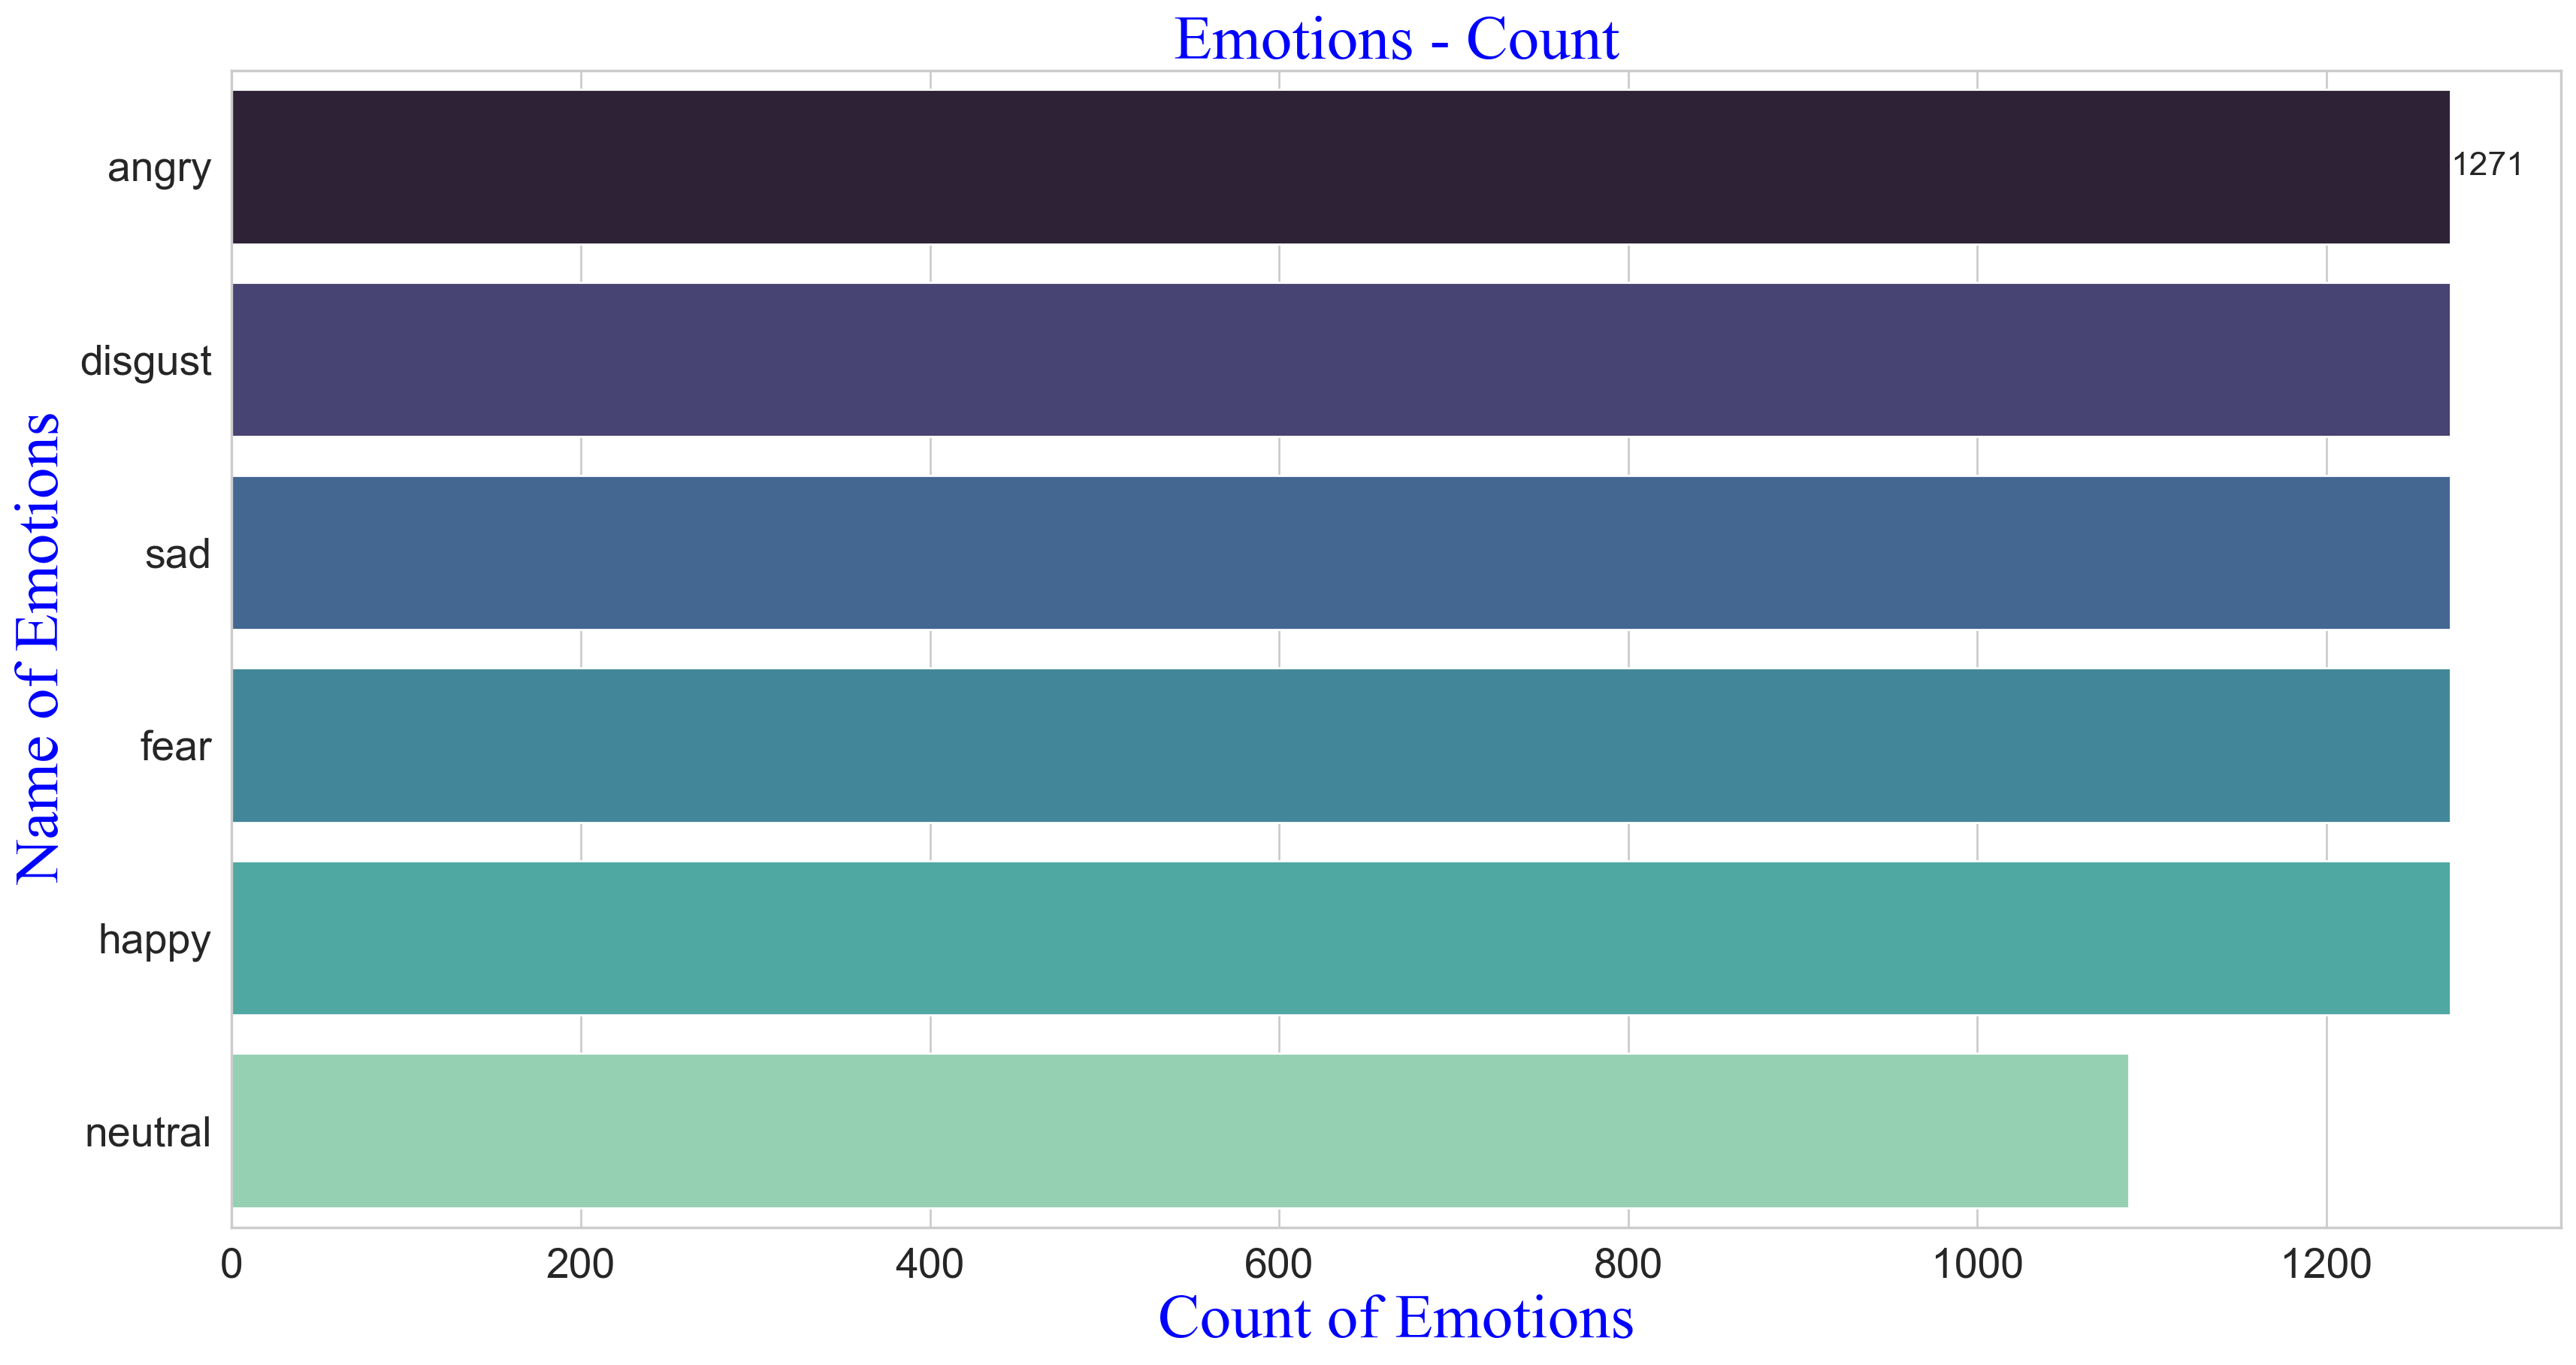

In [ ]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Sum_df['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="mako")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions", fontdict= font1)
plt.xlabel("Count of Emotions", fontdict= font1)
plt.title("Emotions - Count", fontdict= font1)
plt.show()

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


What if we replace "Happines" to "Happy" and "Sadnees" to "Sad" and "calm" to "neutral".
I know that there are some differences between calm and neutal in meaning, but for avoiding unbalance samples, we can replace calm to neutral.

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


As adjectives the difference between calm and neutralis that calm is peaceful, quiet, especially free from anger and anxiety while neutral is not taking sides in a conflict such as war; nonaligned.
As nouns the difference between calm and neutralis that calm is the state of being calm; peacefulness; absence of worry, anger, fear or other strong negative emotion while neutral is a nonaligned state, or a member of such a state.

In [ ]:
Sum_df_rep = Sum_df
Sum_df_rep['Emotions'].replace('happiness', 'happy', inplace=True)
Sum_df_rep['Emotions'].replace('sadness', 'sad', inplace=True)
Sum_df_rep['Emotions'].replace('calm', 'neutral', inplace=True)

In [ ]:
[Sum_df_rep["Emotions"].unique().tolist() for i in Sum_df_rep.columns]

[['angry', 'neutral', 'disgust', 'sad', 'fear', 'happy'],
 ['angry', 'neutral', 'disgust', 'sad', 'fear', 'happy']]

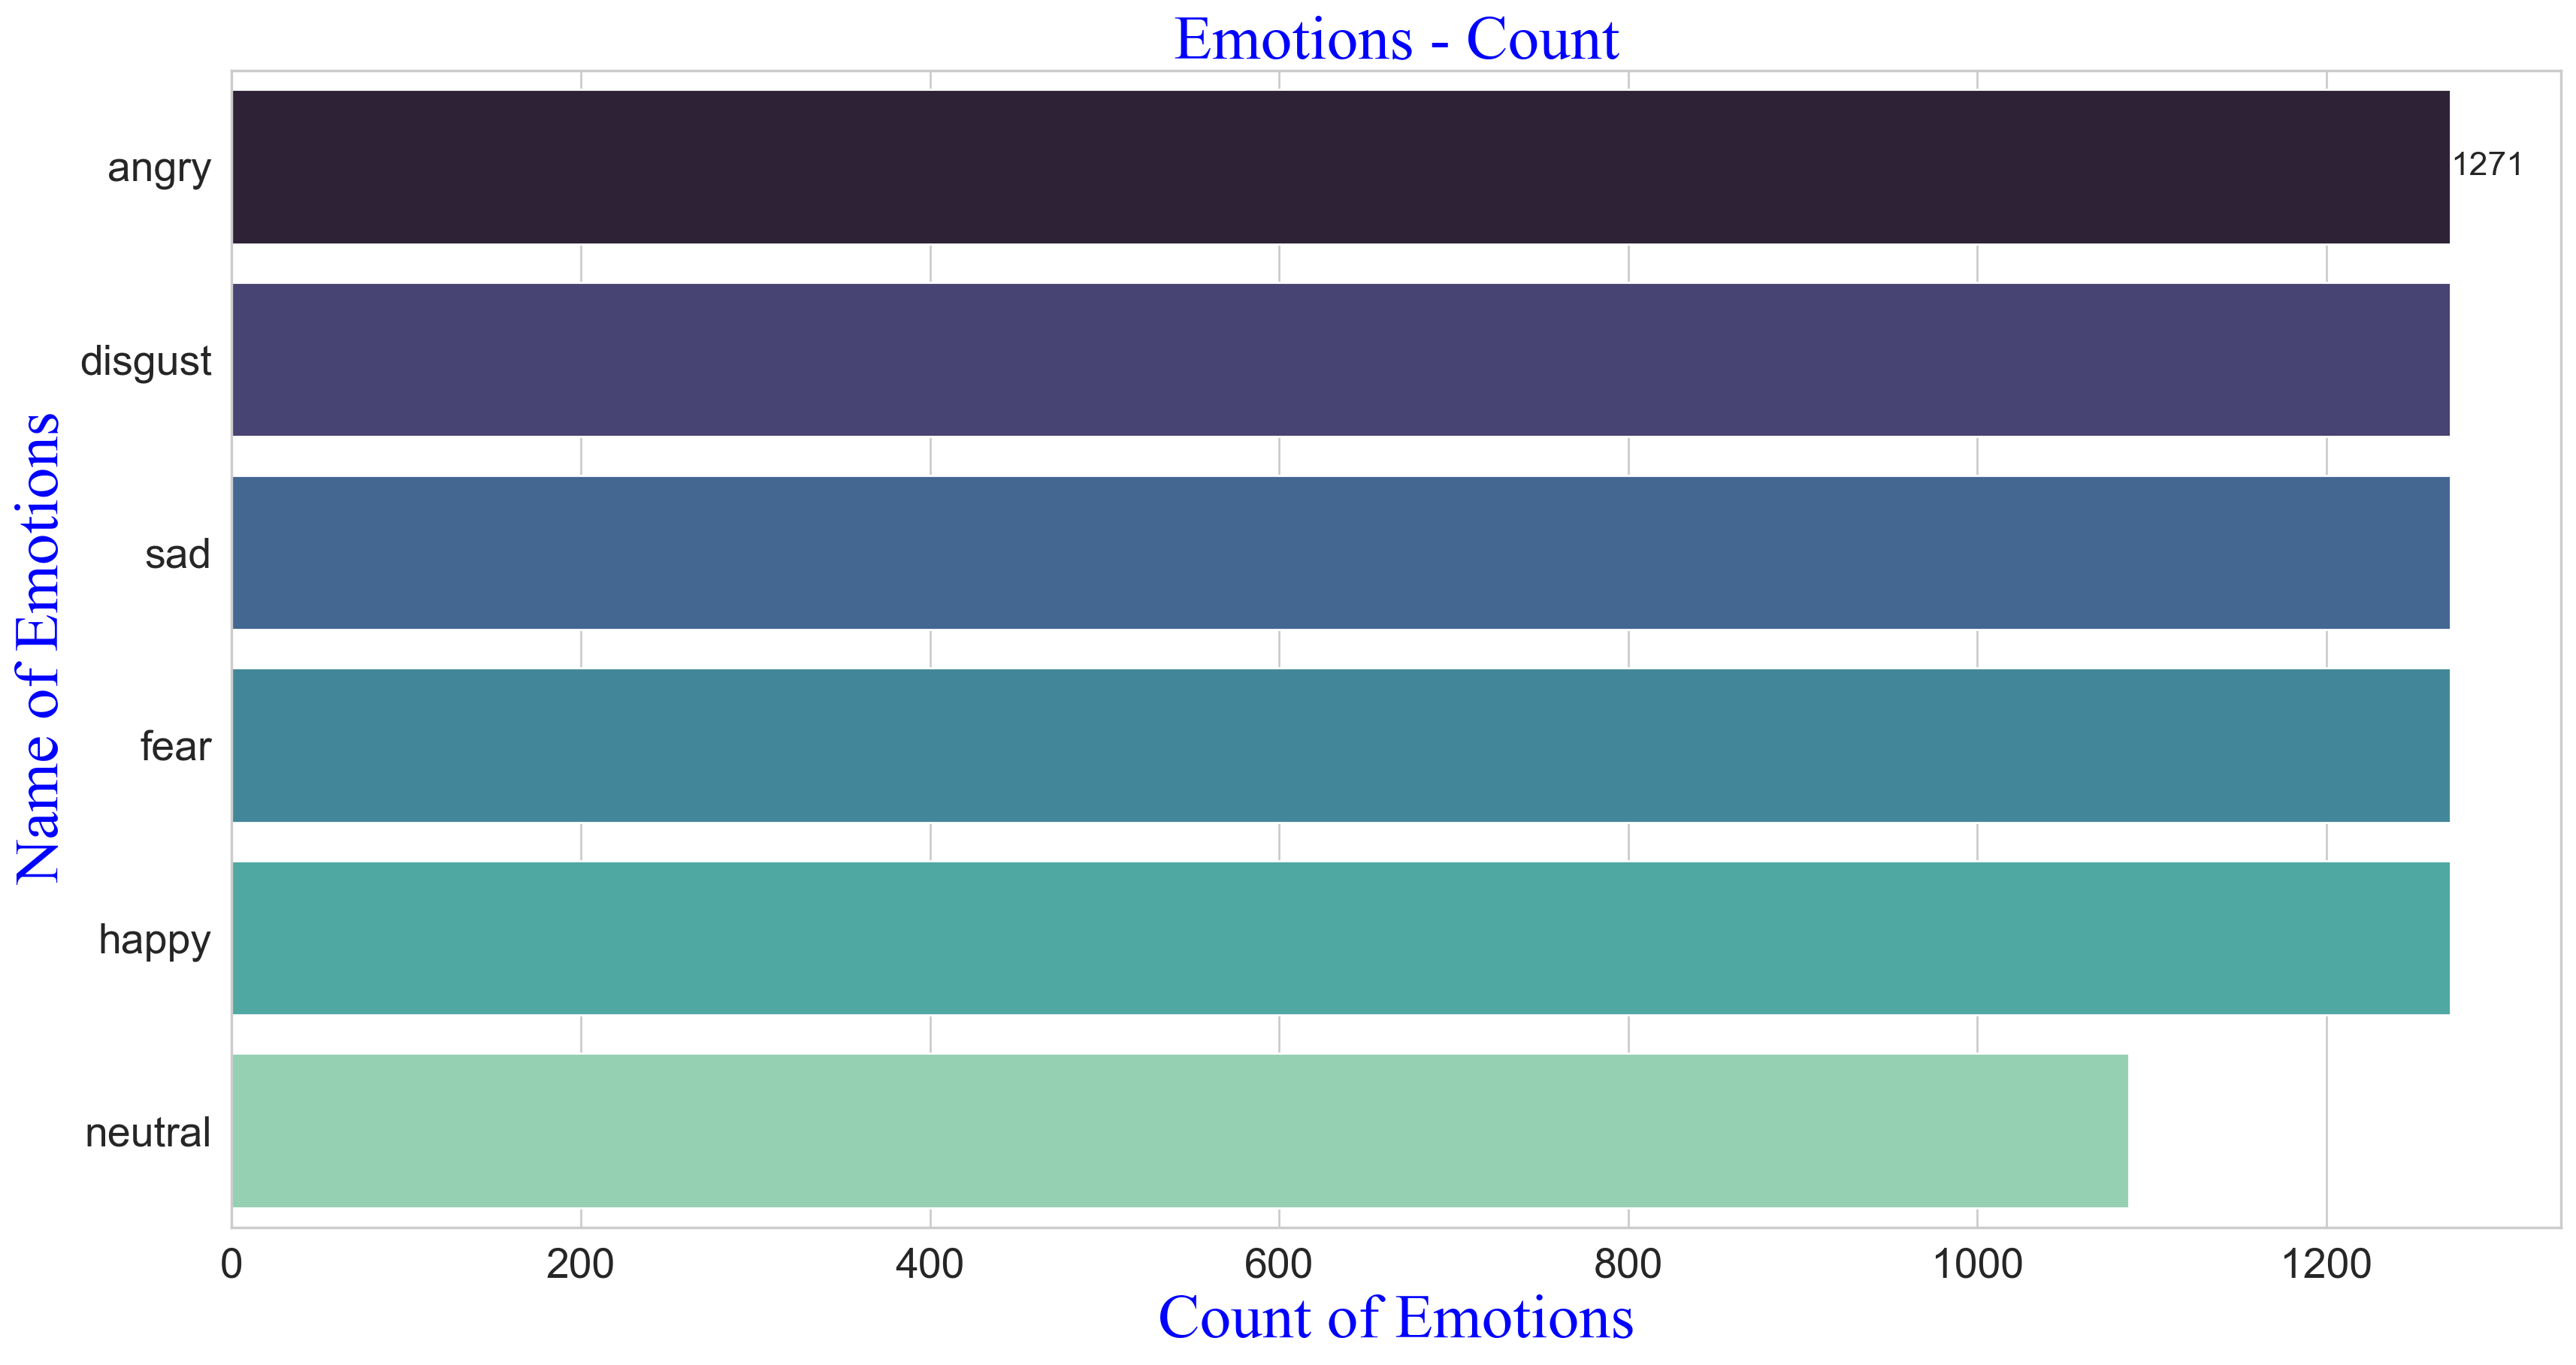

In [ ]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Sum_df_rep['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="mako")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions", fontdict= font1)
plt.xlabel("Count of Emotions", fontdict= font1)
plt.title("Emotions - Count", fontdict= font1)
plt.show()

Seems better

* **[Table of Content](#0)**

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **4- Waveplot**

  - Waveforms are essential representations of speech signals, capturing the pressure variations that travel through the air. However, when analyzing speech, we often need to focus on specific segments or phonemes within the signal. This is where the Short-Time Fourier Transform (STFT) becomes valuable.


<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>

**Quantization: audio-to-digital conversion**

The analog-to-digital conversion process is called quantization and it's very similar to the way cameras capture video. A video camera reconstructs a continuous moment in time by capturing thousands of consecutive images per second, called frames. The higher the frame rate, the smoother the movie. In digital audio, an anlog-to-digital converter captures thousands of audio samples per second at a specified sample rate and bit depth to reconstruct the original signal. The higher the sample rate and bit depth, the higher the audio resolution.

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


**Sample rate** is the number of samples per second that are taken of a waveform to create a discrete digital signal. The higher the sample rate, the more snapshots you capture of the audio signal. The audio sample rate is measured in kilohertz (kHz) and it determines the range of frequencies captured in digital audio. In most DAWs, you’ll find an adjustable sample rate in your audio preferences. This controls the sample rate for audio in your project.

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>

If you’re recording music, a standard sample rate is **44.1 kHz or 44,100 samples per second**. This is the standard for most consumer audio, used for formats like CDs. 48 kHz is another common audio sample rate used for movies. The higher sample rate technically leads to more measurements per second and a closer recreation of the original audio, so 48kHz is often used in audio for video which usually calls for a big dynamic range.

In [ ]:
%%time
audio_arrays = []

for i in Sum_df_rep['Path']:
    y, sr = librosa.load(i, sr=44100)
    audio_arrays.append(y)
    
Sum_df_rep['Arrays'] = audio_arrays

CPU times: user 13.5 s, sys: 2.28 s, total: 15.7 s
Wall time: 29.5 s


In [ ]:
Sum_df_rep.head().style.set_properties(**{'background-color': '#9490ff',
                           'color': 'black',
                           'border-color': 'black'})

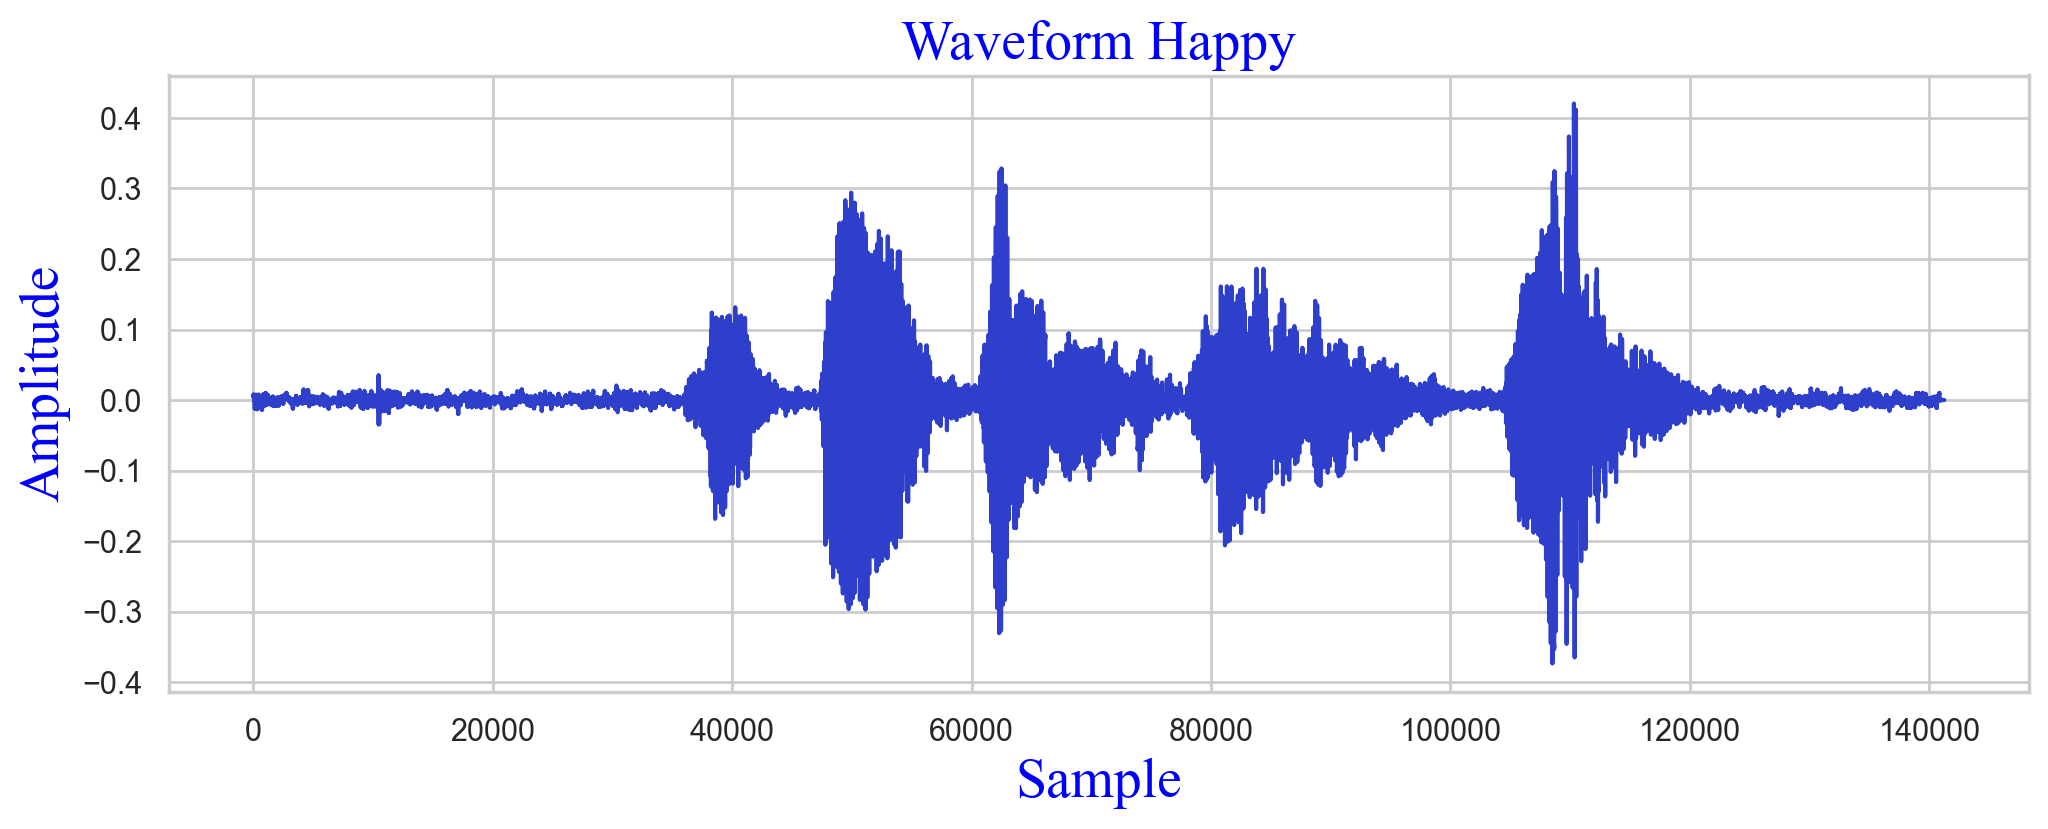

In [ ]:
happy_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'happy']['Path']
happy_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'happy']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(happy_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform Happy', fontdict= font2)
plt.show()

Audio(happy_sp.iloc[0])

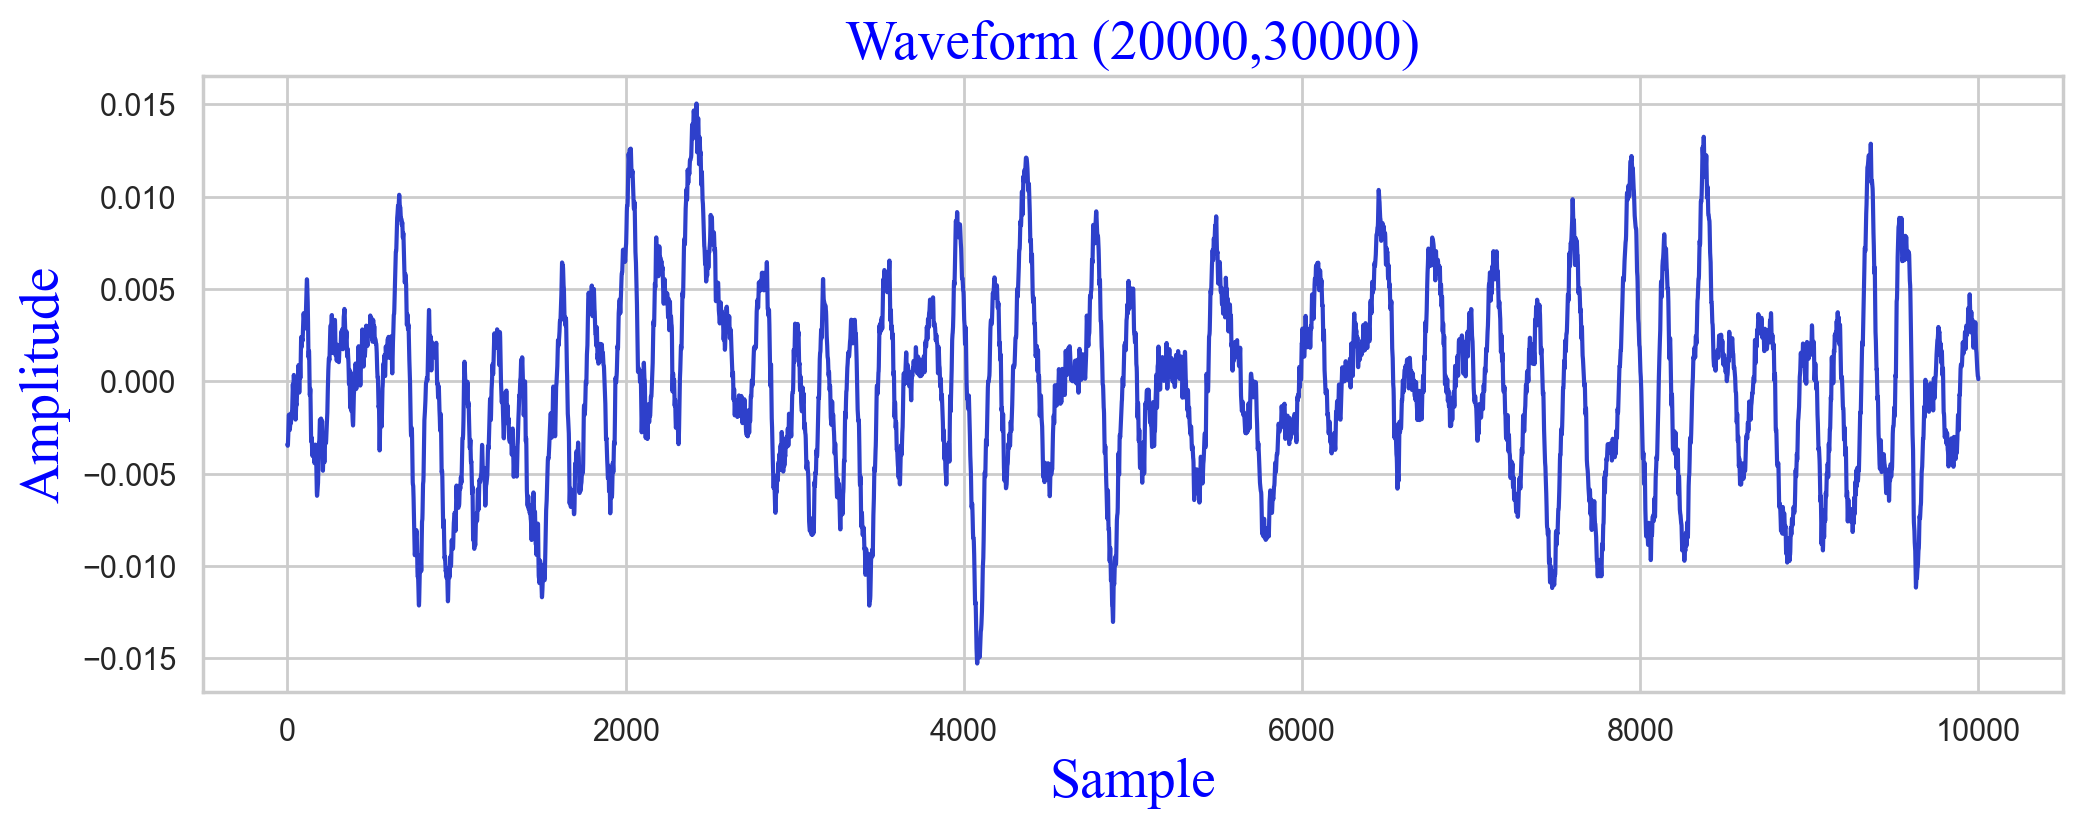

In [ ]:
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(happy_arr.iloc[0][20000:30000], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform (20000,30000)', fontdict= font2)
plt.show()

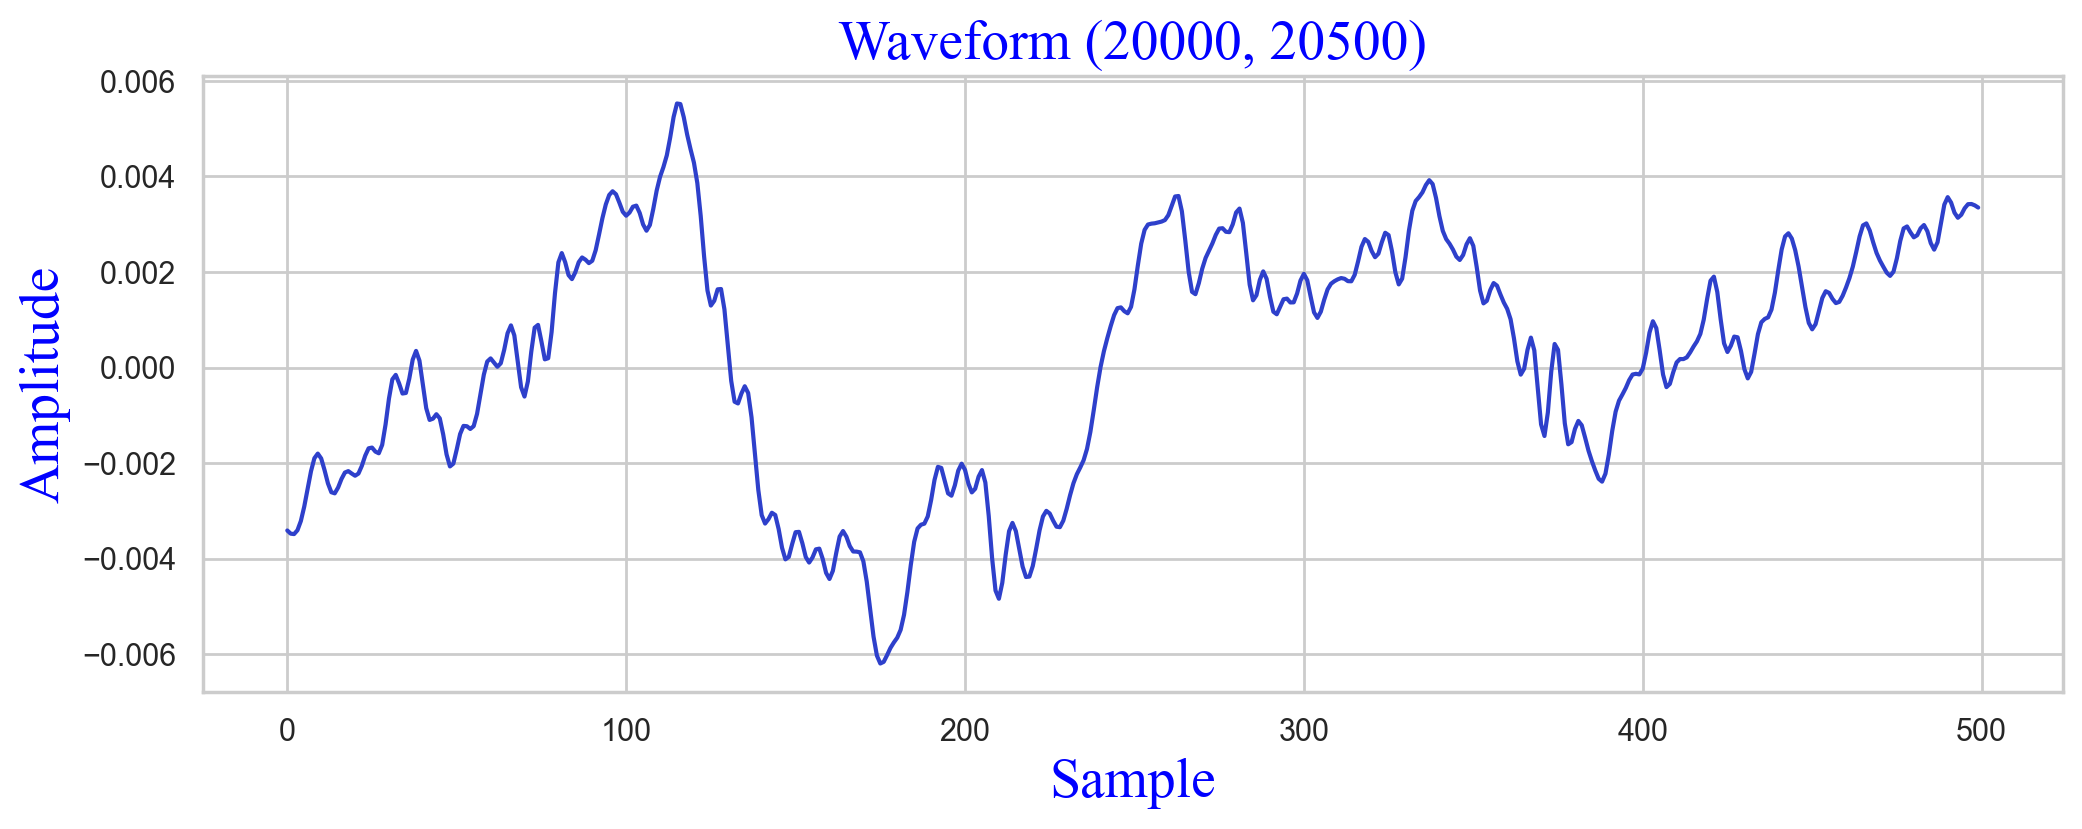

In [ ]:
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(happy_arr.iloc[0][20000:20500], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform (20000, 20500)', fontdict= font2)
plt.show()

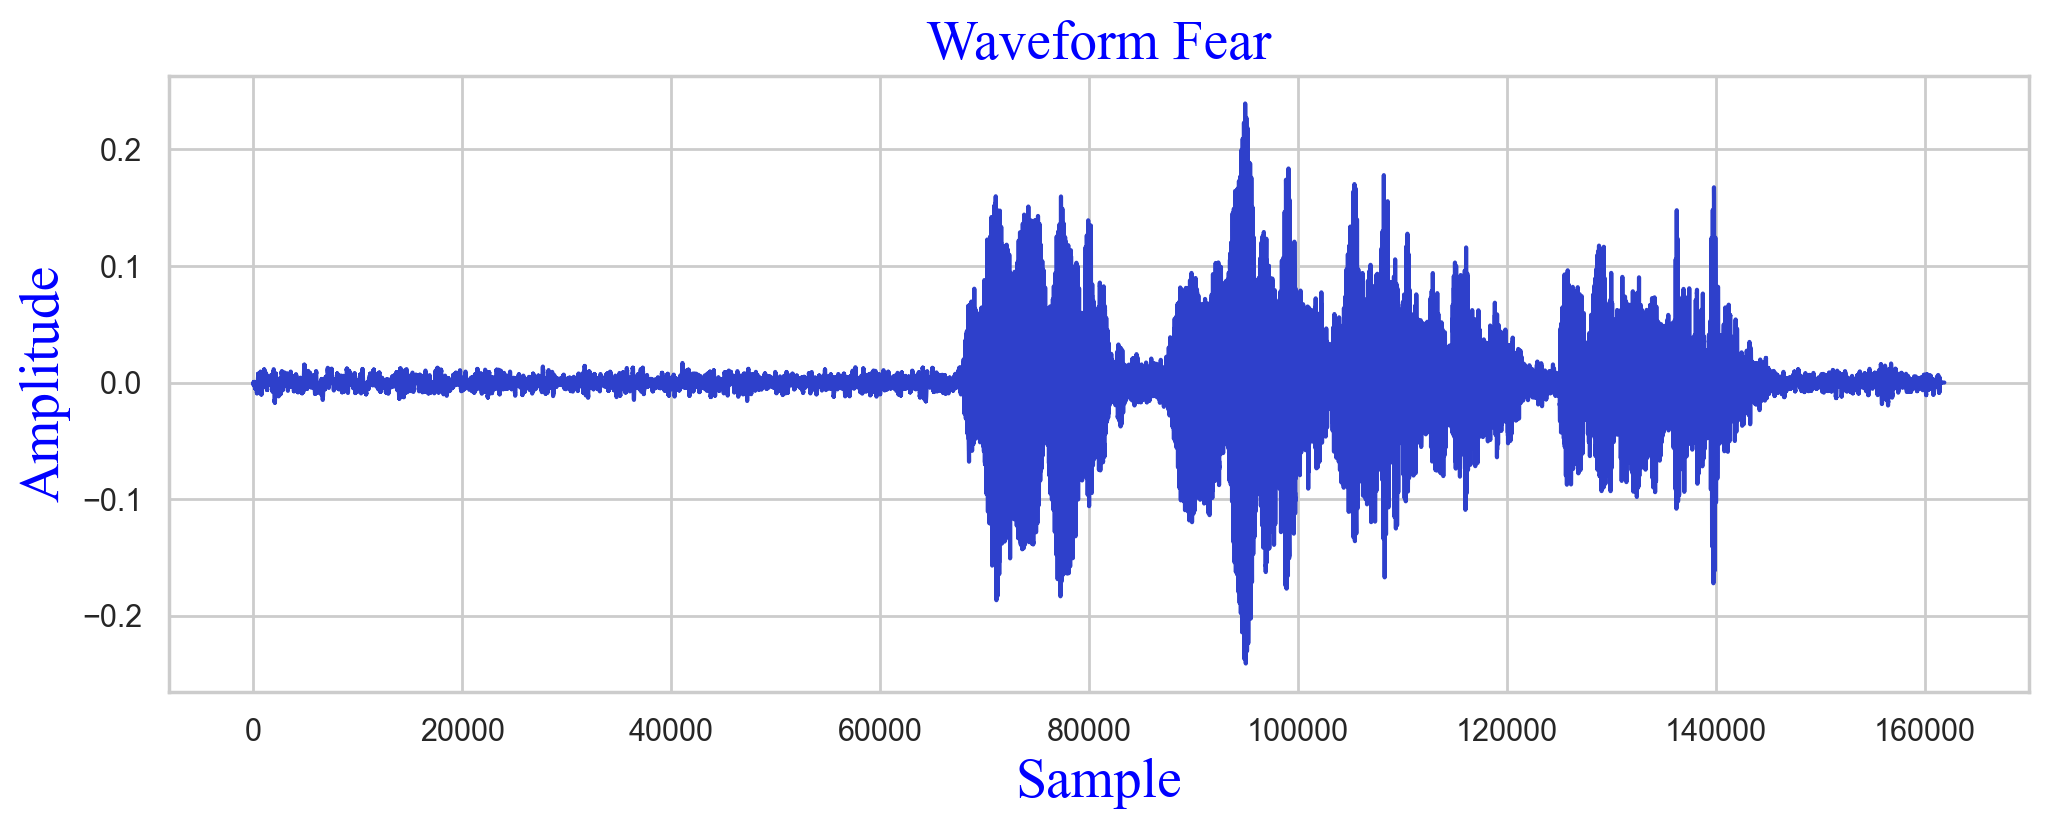

In [ ]:
fear_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'fear']['Path']
fear_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'fear']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(fear_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform Fear', fontdict= font2)
plt.show()

Audio(fear_sp.iloc[0])

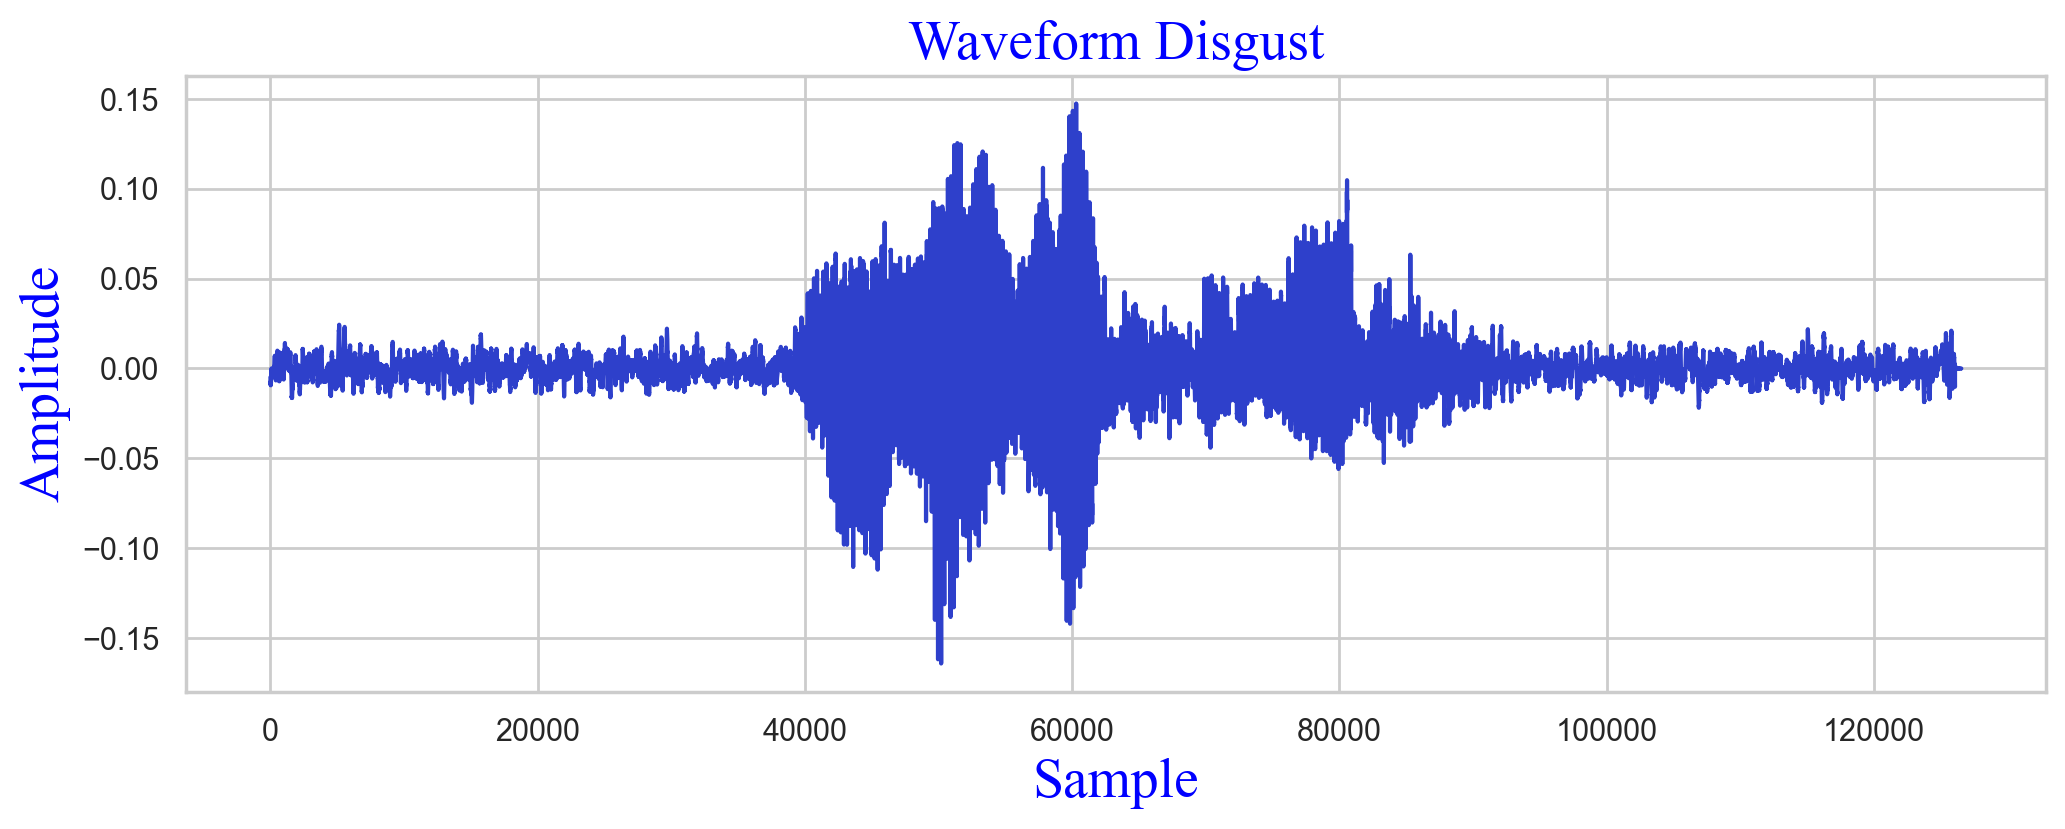

In [ ]:
disgust_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'disgust']['Path']
disgust_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'disgust']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(disgust_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform Disgust', fontdict= font2)
plt.show()

Audio(disgust_sp.iloc[0])

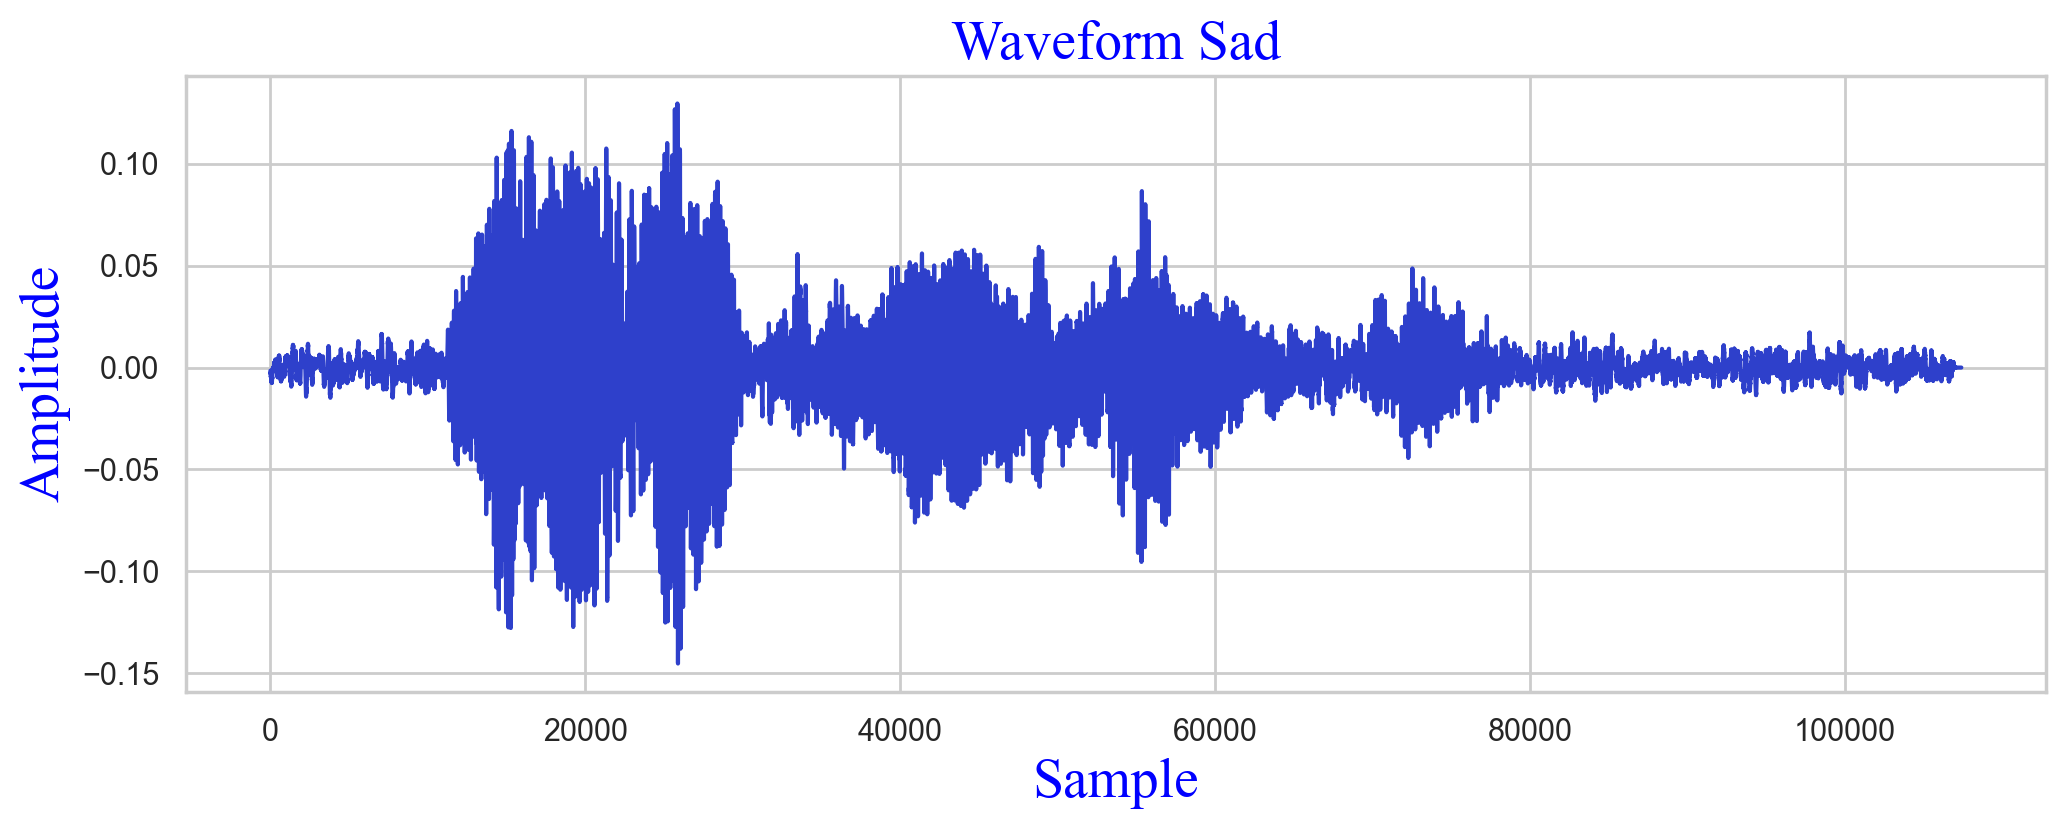

In [ ]:
sad_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'sad']['Path']
sad_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'sad']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(sad_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform Sad', fontdict= font2)
plt.show()

Audio(sad_sp.iloc[0])

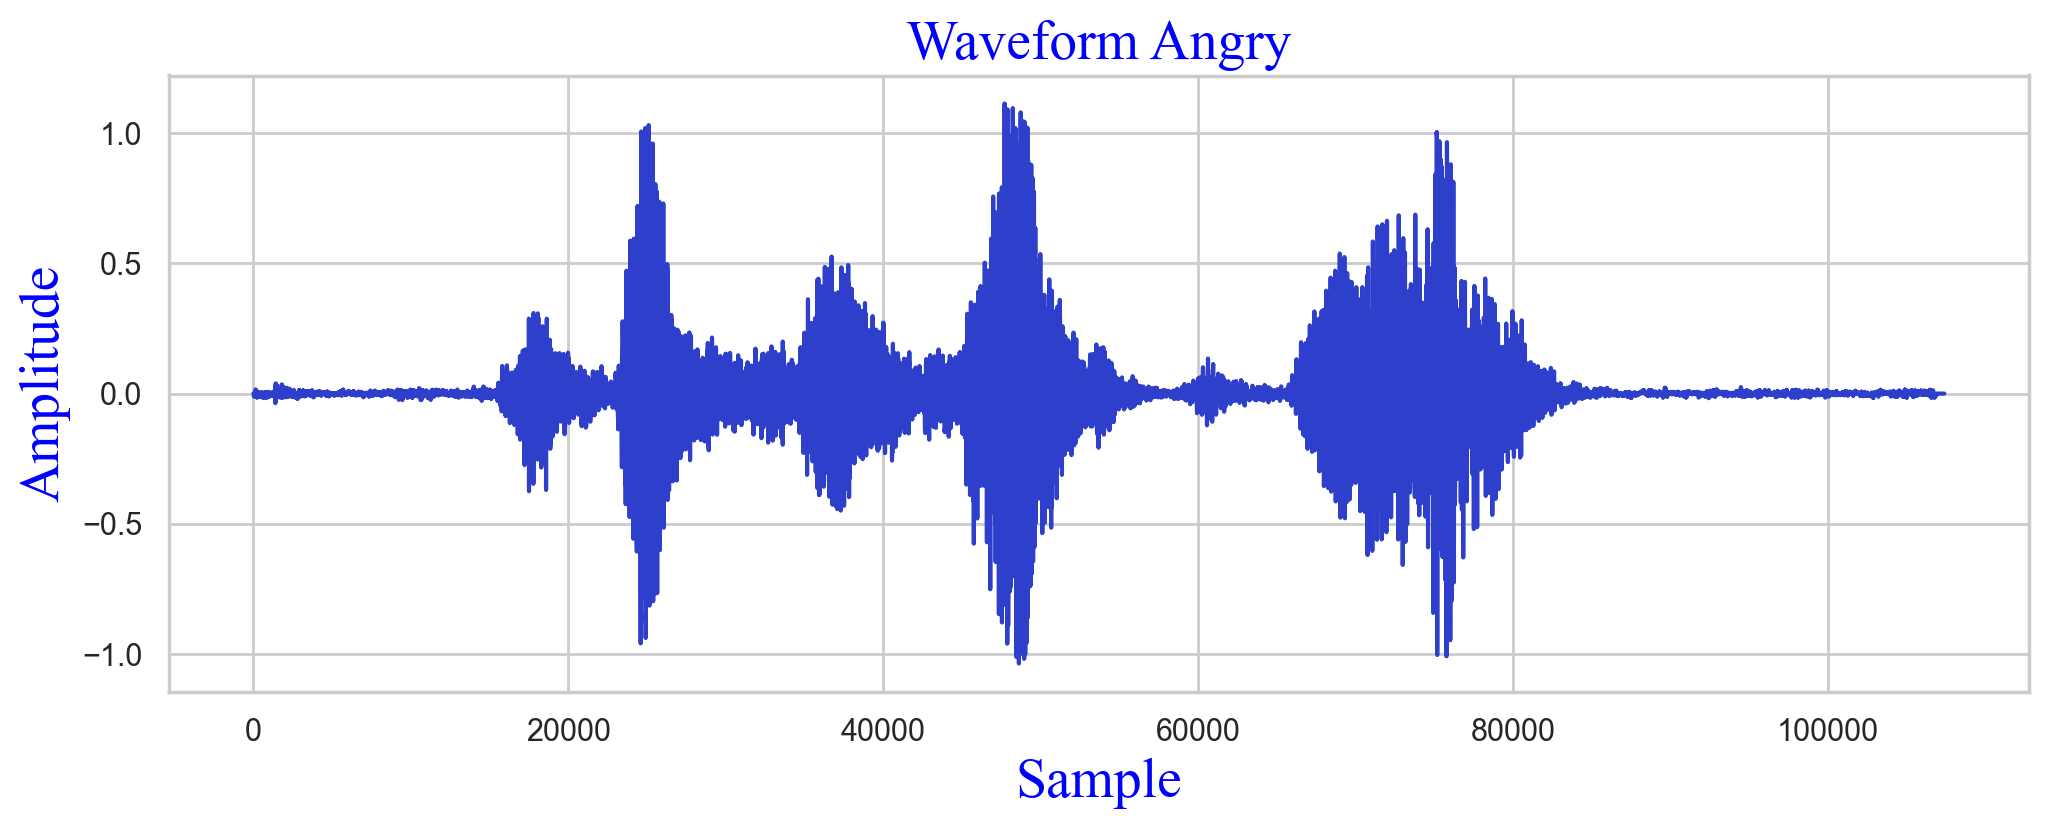

In [ ]:
angry_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'angry']['Path']
angry_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'angry']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(angry_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform Angry', fontdict= font2)
plt.show()

Audio(angry_sp.iloc[0])

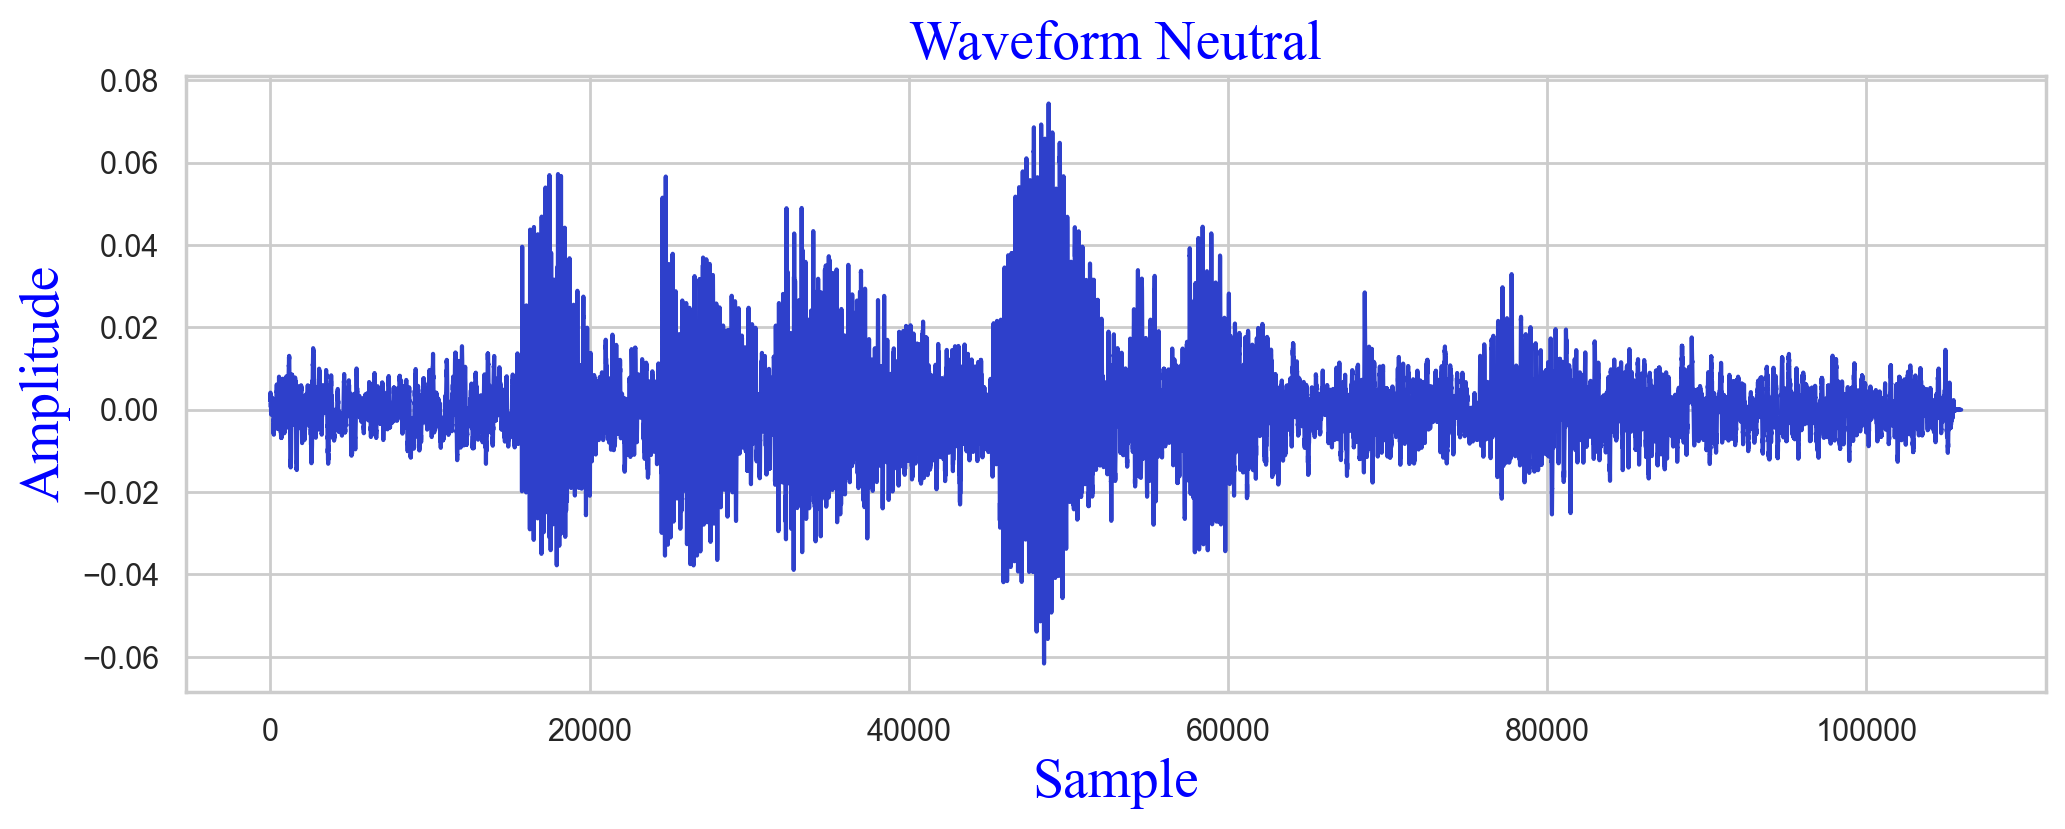

In [ ]:
neutral_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'neutral']['Path']
neutral_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'neutral']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(neutral_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform Neutral', fontdict= font2)
plt.show()

Audio(neutral_sp.iloc[0])

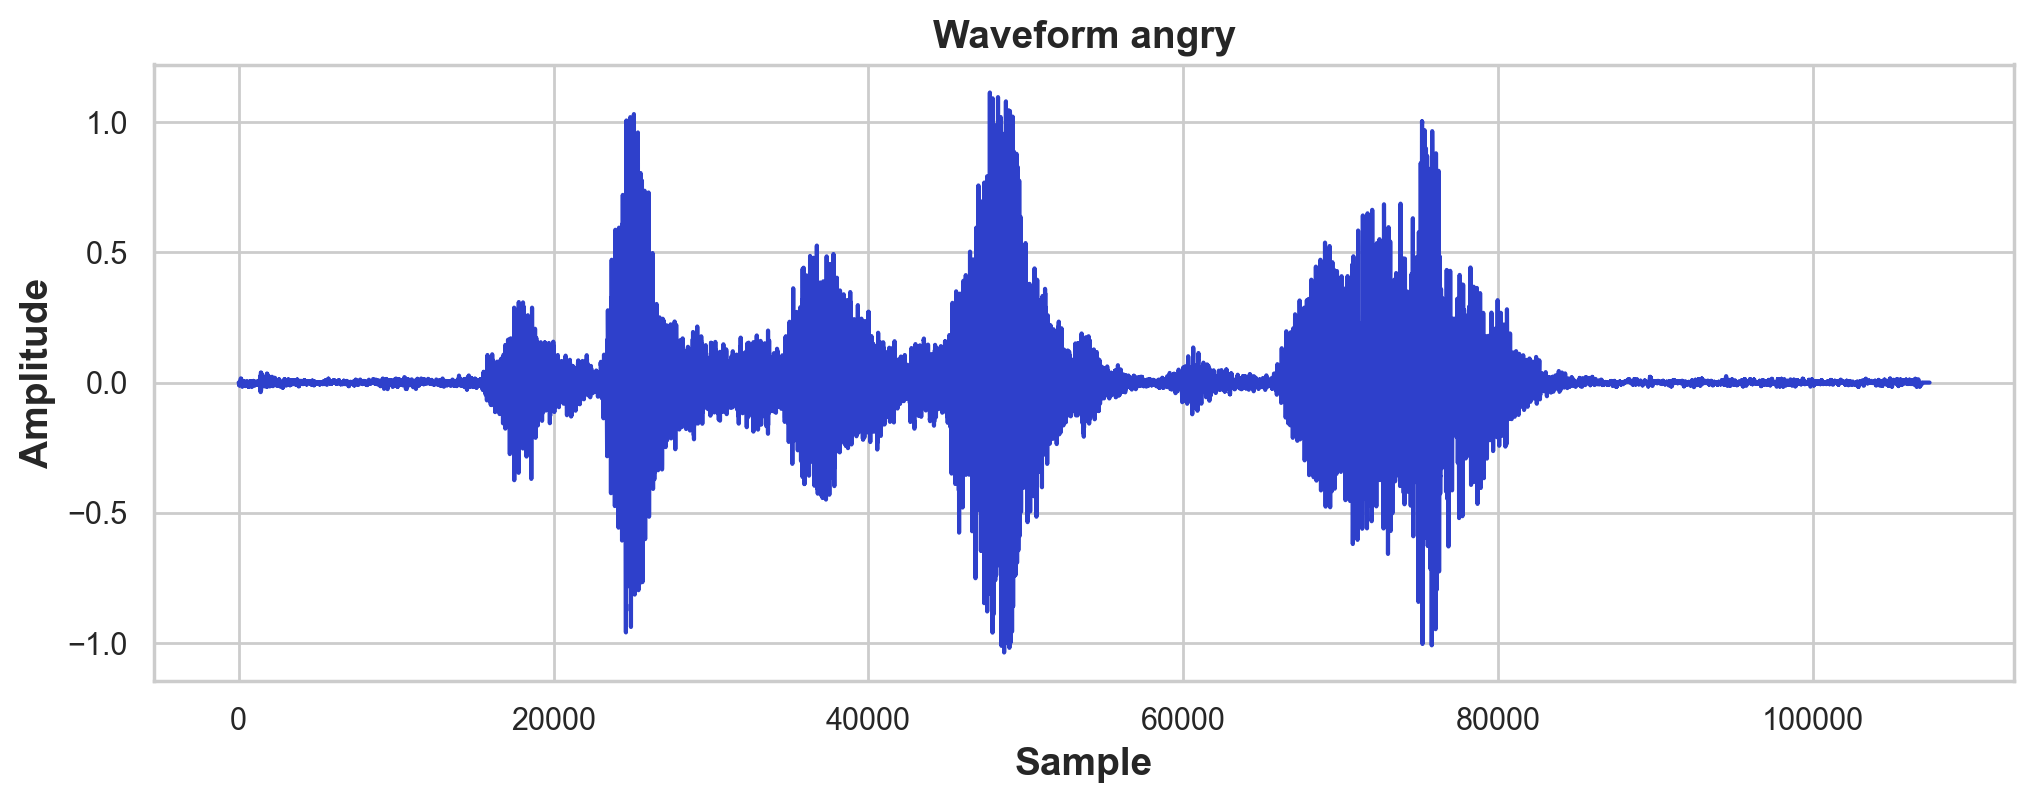

In [ ]:
angry_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'angry']['Path']
angry_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'angry']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(angry_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform angry', fontdict= font2)
plt.show()

Audio(angry_sp.iloc[0])

* **[Table of Content](#0)**

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **5- Amplitude Envelope**

  - The amplitude envelope in speech recognition refers to the variation in signal intensity over time. It captures the envelope shape of the speech waveform, highlighting the rise and fall of energy during each syllable or phoneme. While spectral details provide information about individual speech sounds, the amplitude envelope is crucial when spectral resolution is limited.


<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>



  In speech recognition, the sample duration refers to the time window over which audio data is    analyzed. When capturing audio, you can specify a duration for recording or listening.

In [ ]:
sample_duration = 1/sr
print(sample_duration)

2.2675736961451248e-05


In [ ]:
#duration of the audio signals in seconds
duration = sample_duration * len(audio_arrays)
print(f"Duration of signal is: {duration:.2f} seconds")

Duration of signal is: 0.17 seconds


In [ ]:
Frame_size = 1024
#HOP =  Current frame how many samples shift to the right for calculating the next frame
Hop_lenght = 512 

#calculate the amplitude envelope

def amplitude_env (signal, frame_size, hop_length):
    amplitude_envelope = []
    
    #calculate AE (Amp Env) for each frame
    for i in range (0, len(signal), hop_length):
        current_frame_amplitude_env = max(signal[i:i+frame_size])
        amplitude_envelope.append(current_frame_amplitude_env)
        
    return np.array(amplitude_envelope)


def fancy_amplitude_env (signal, frame_size, hop_length):
    
    return np.array([max(signal[i:i+frame_size]) for i in range(0, signal.size, hop_length)])

In [ ]:
# Samples

Sp_fear = fear_arr.iloc[0]
Sp_disgust= disgust_arr.iloc[0]
Sp_happy= happy_arr.iloc[0]
Sp_sad = sad_arr.iloc[0]
Sp_neutral = neutral_arr.iloc[0]
Sp_angry = angry_arr.iloc[0]
Sp_surprise = surprise_arr.iloc[0]

In [ ]:
AE_fear = amplitude_env(Sp_fear, Frame_size, Hop_lenght)
AE_disgust = amplitude_env(Sp_disgust, Frame_size, Hop_lenght)
AE_happy = amplitude_env(Sp_happy, Frame_size, Hop_lenght)
AE_sad = amplitude_env(Sp_sad, Frame_size, Hop_lenght)
AE_neutral = amplitude_env(Sp_neutral, Frame_size, Hop_lenght)
AE_angry = amplitude_env(Sp_angry, Frame_size, Hop_lenght)
AE_surprise = amplitude_env(Sp_surprise, Frame_size, Hop_lenght)

print(len(AE_fear), len(AE_disgust), len(AE_angry), len(AE_happy), len(AE_neutral),
     len(AE_surprise), len(AE_sad))


317 248 210 276 207 210 210


In [ ]:
fancy_AE_fear = fancy_amplitude_env(Sp_fear, Frame_size, Hop_lenght)
fancy_AE_disgust = fancy_amplitude_env(Sp_disgust, Frame_size, Hop_lenght)
fancy_AE_happy = fancy_amplitude_env(Sp_happy, Frame_size, Hop_lenght)
fancy_AE_sad = fancy_amplitude_env(Sp_sad, Frame_size, Hop_lenght)
fancy_AE_neutral = fancy_amplitude_env(Sp_neutral, Frame_size, Hop_lenght)
fancy_AE_angry = fancy_amplitude_env(Sp_angry, Frame_size, Hop_lenght)
fancy_AE_surprise = fancy_amplitude_env(Sp_surprise, Frame_size, Hop_lenght)

print(len(fancy_AE_fear), len(fancy_AE_disgust), len(fancy_AE_angry),
      len(fancy_AE_happy), len(fancy_AE_neutral),
     len(fancy_AE_surprise), len(fancy_AE_sad))

317 248 210 276 207 210 210


In [ ]:
(AE_fear == fancy_AE_fear).all()

np.True_

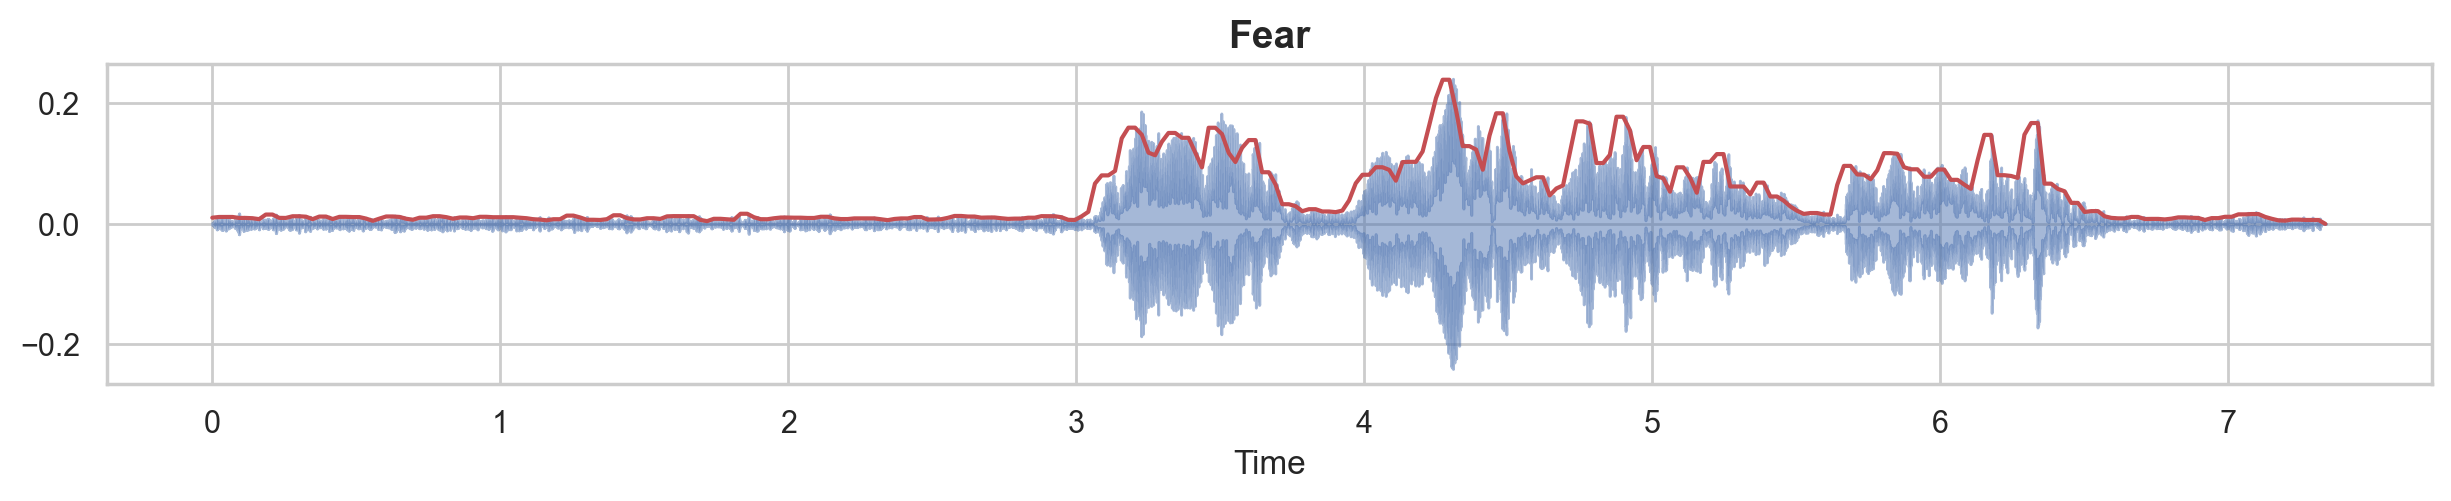

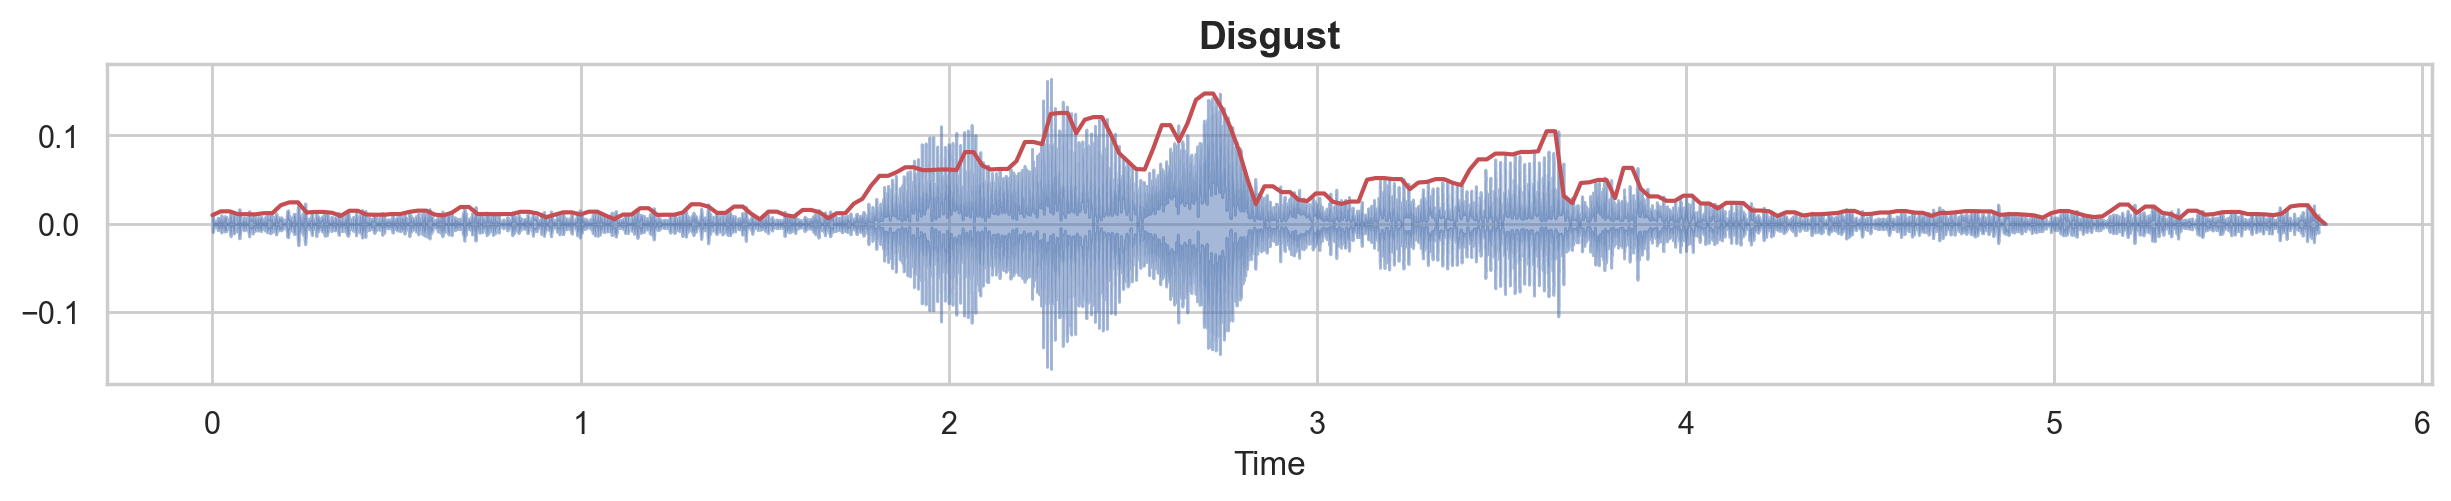

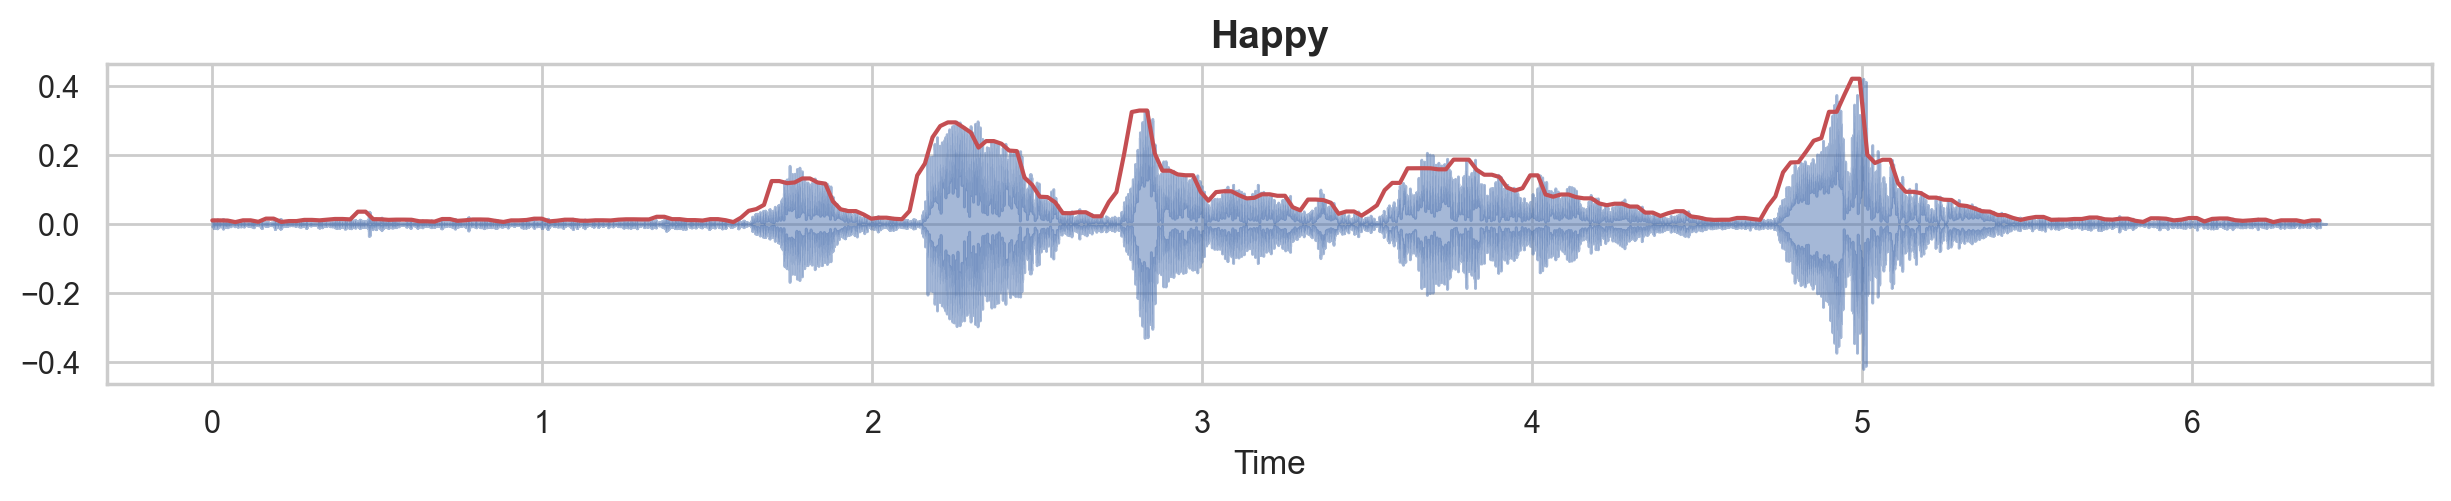

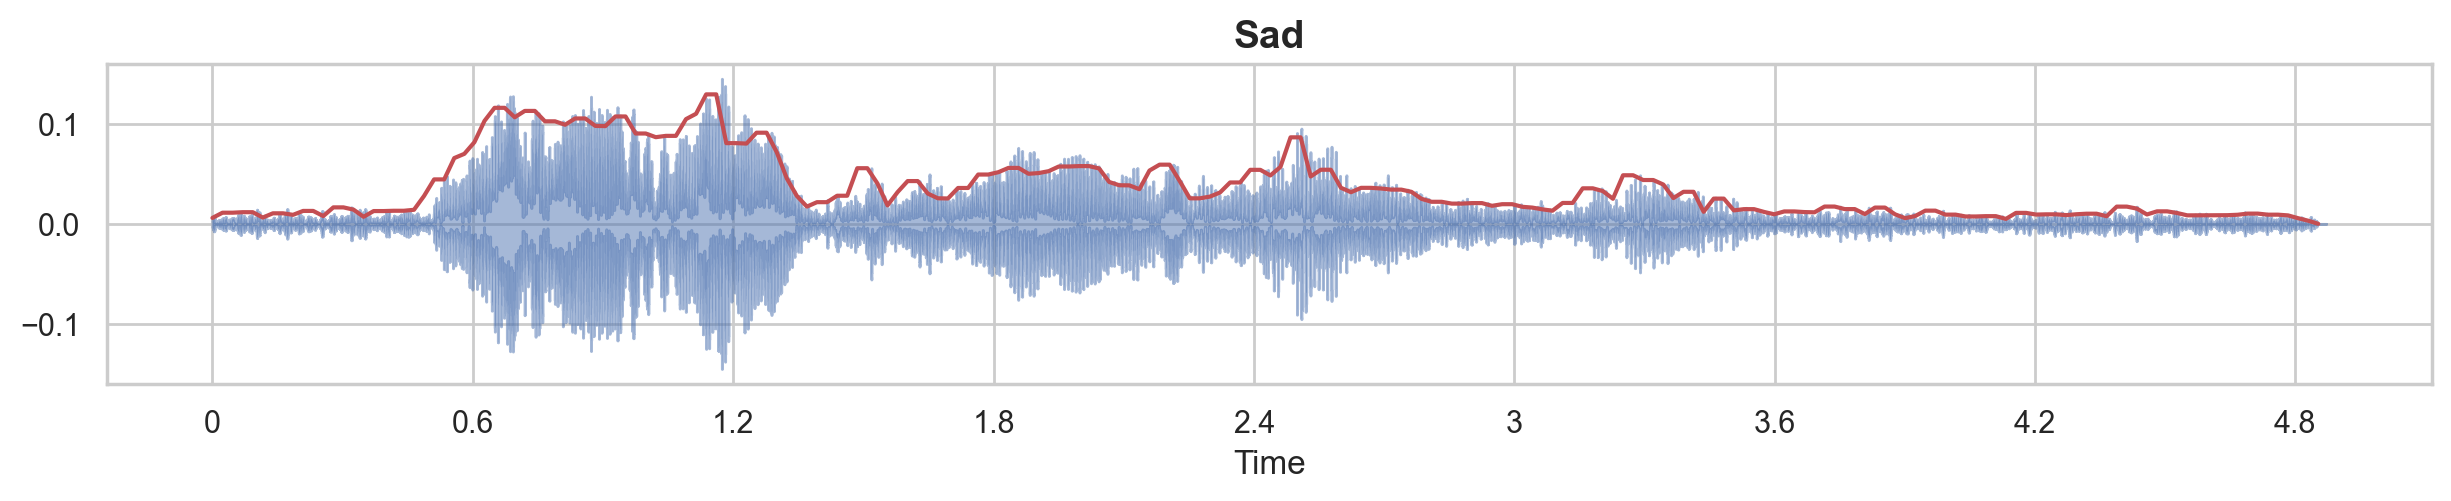

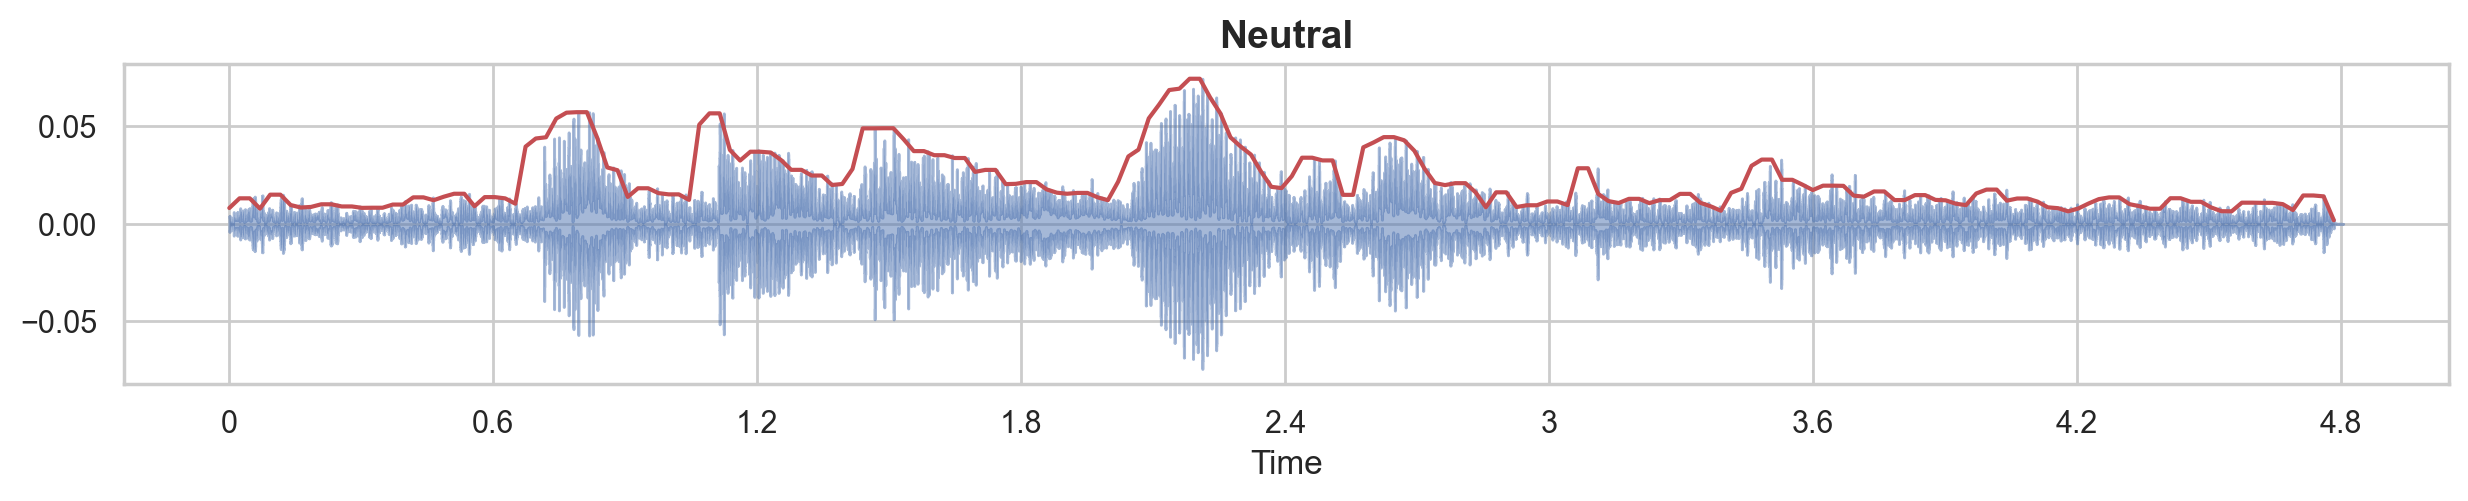

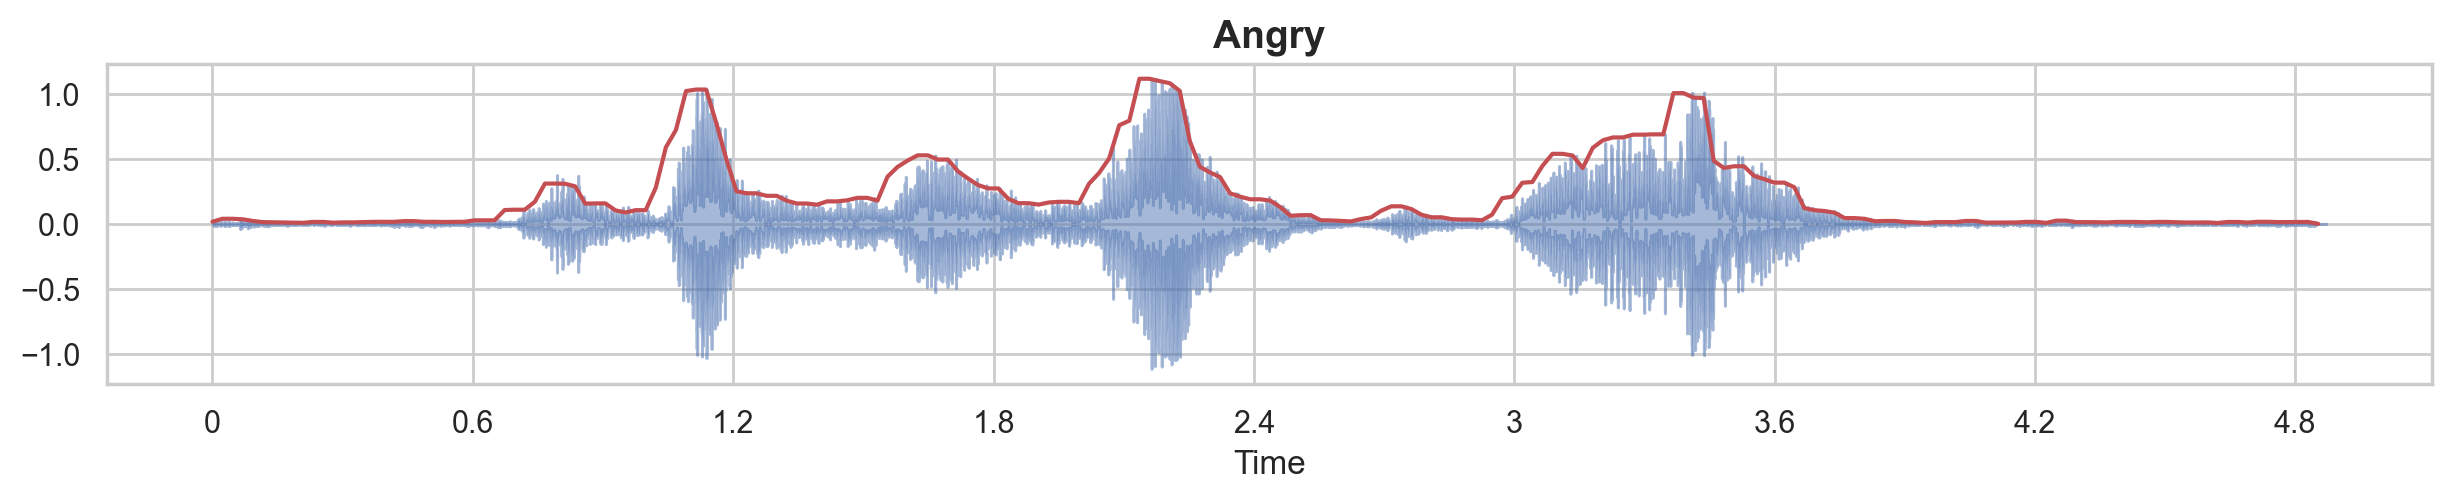

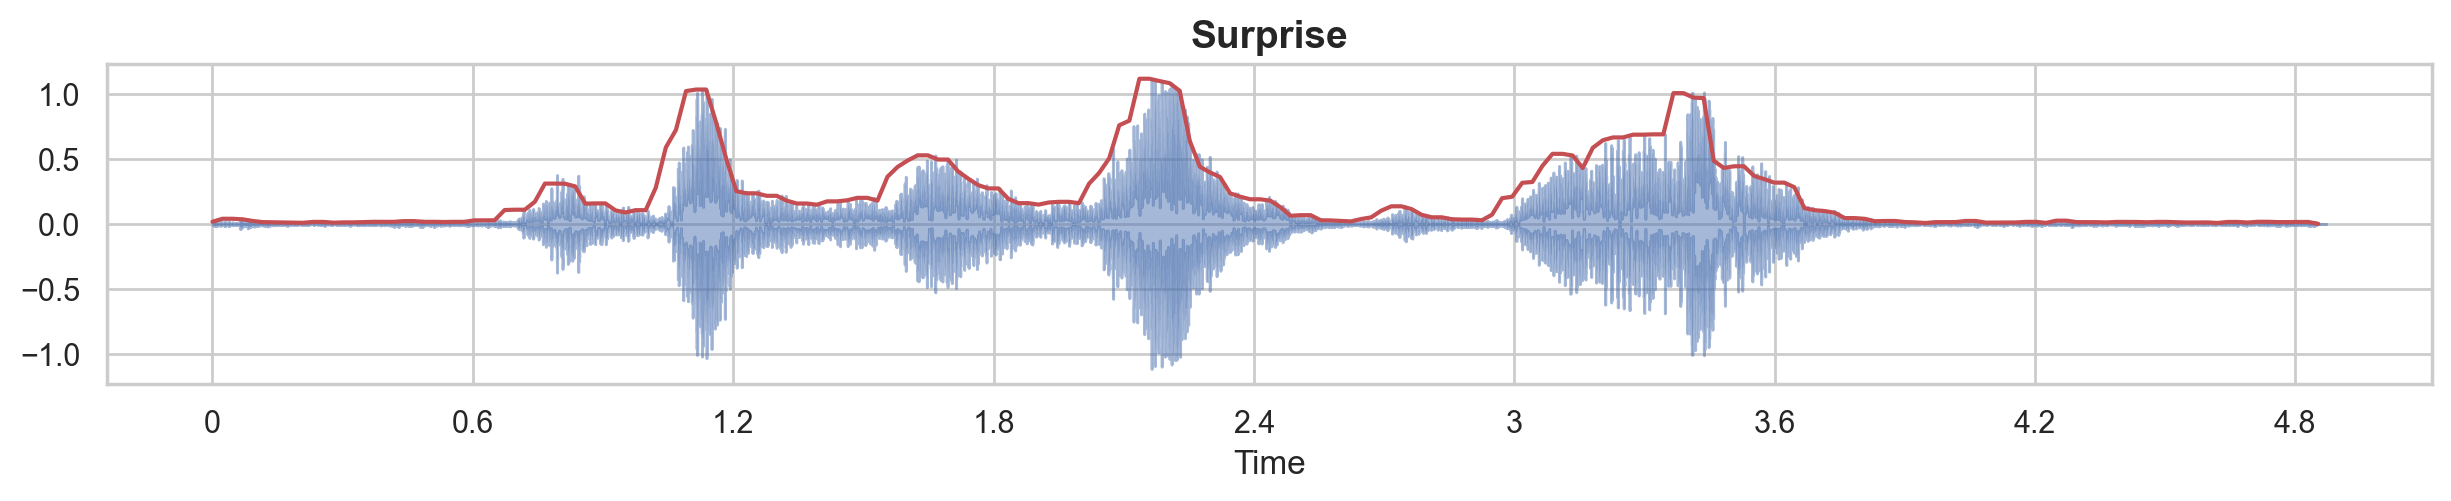

In [ ]:
#Visualize amplitude envelope for all the audio files (Samples of each)

frames_fear = range(0, AE_fear.size)
frames_disgust = range(0, AE_disgust.size)
frames_happy = range(0, AE_happy.size)
frames_sad = range(0, AE_sad.size)
frames_neutral = range(0, AE_neutral.size)
frames_angry = range(0, AE_angry.size)
frames_surprise = range(0, AE_surprise.size)

t1 = librosa.frames_to_time(frames_fear, hop_length = Hop_lenght)
t2 = librosa.frames_to_time(frames_disgust, hop_length = Hop_lenght)
t3 = librosa.frames_to_time(frames_happy, hop_length = Hop_lenght)
t4 = librosa.frames_to_time(frames_sad, hop_length = Hop_lenght)
t5 = librosa.frames_to_time(frames_neutral, hop_length = Hop_lenght)
t6 = librosa.frames_to_time(frames_angry, hop_length = Hop_lenght)
t7 = librosa.frames_to_time(frames_surprise, hop_length = Hop_lenght)


plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,1)
librosa.display.waveshow(Sp_fear, alpha = 0.5)
plt.plot(t1, AE_fear, color = "r")
plt.title("Fear", fontdict= font2)
plt.show()

plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,2)
librosa.display.waveshow(Sp_disgust, alpha = 0.5)
plt.plot(t2, AE_disgust, color = "r")
plt.title("Disgust", fontdict= font2)
plt.show()

plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,3)
librosa.display.waveshow(Sp_happy, alpha = 0.5)
plt.plot(t3, AE_happy, color = "r")
plt.title("Happy", fontdict= font2)
plt.show()

plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,4)
librosa.display.waveshow(Sp_sad, alpha = 0.5)
plt.plot(t4, AE_sad, color = "r")
plt.title("Sad", fontdict= font2)
plt.show()


plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,5)
librosa.display.waveshow(Sp_neutral, alpha = 0.5)
plt.plot(t5, AE_neutral, color = "r")
plt.title("Neutral", fontdict= font2)
plt.show()


plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,6)
librosa.display.waveshow(Sp_angry, alpha = 0.5)
plt.plot(t6, AE_angry, color = "r")
plt.title("Angry", fontdict= font2)
plt.show()


plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,7)
librosa.display.waveshow(Sp_surprise, alpha = 0.5)
plt.plot(t7, AE_surprise, color = "r")
plt.title("Surprise", fontdict= font2)
plt.show()

* **[Table of Content](#0)**

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **6- Augmentation (Noise, Stretch)**

  - Data augmentation plays a crucial role in improving the performance of speech recognition models. Let’s explore two common audio augmentation techniques: noise injection and time stretching.Data augmentation plays a crucial role in improving the performance of speech recognition models. Let’s explore two common audio augmentation techniques: noise injection and time stretching.
    
    **Noise Injection:** Adding noise to the audio data helps the model become more robust to real-world variations.Adding noise to the audio data helps the model become more robust to real-world variations.
    
    **Time Stretching:** Time stretching alters the duration of an audio clip without changing its pitch.Time stretching alters the duration of an audio clip without changing its pitch.



In [ ]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data



def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=0.8)


# taking any example and checking for techniques.
path = np.array(Sum_df_rep.Path)[1]
data, sample_rate = librosa.load(path)

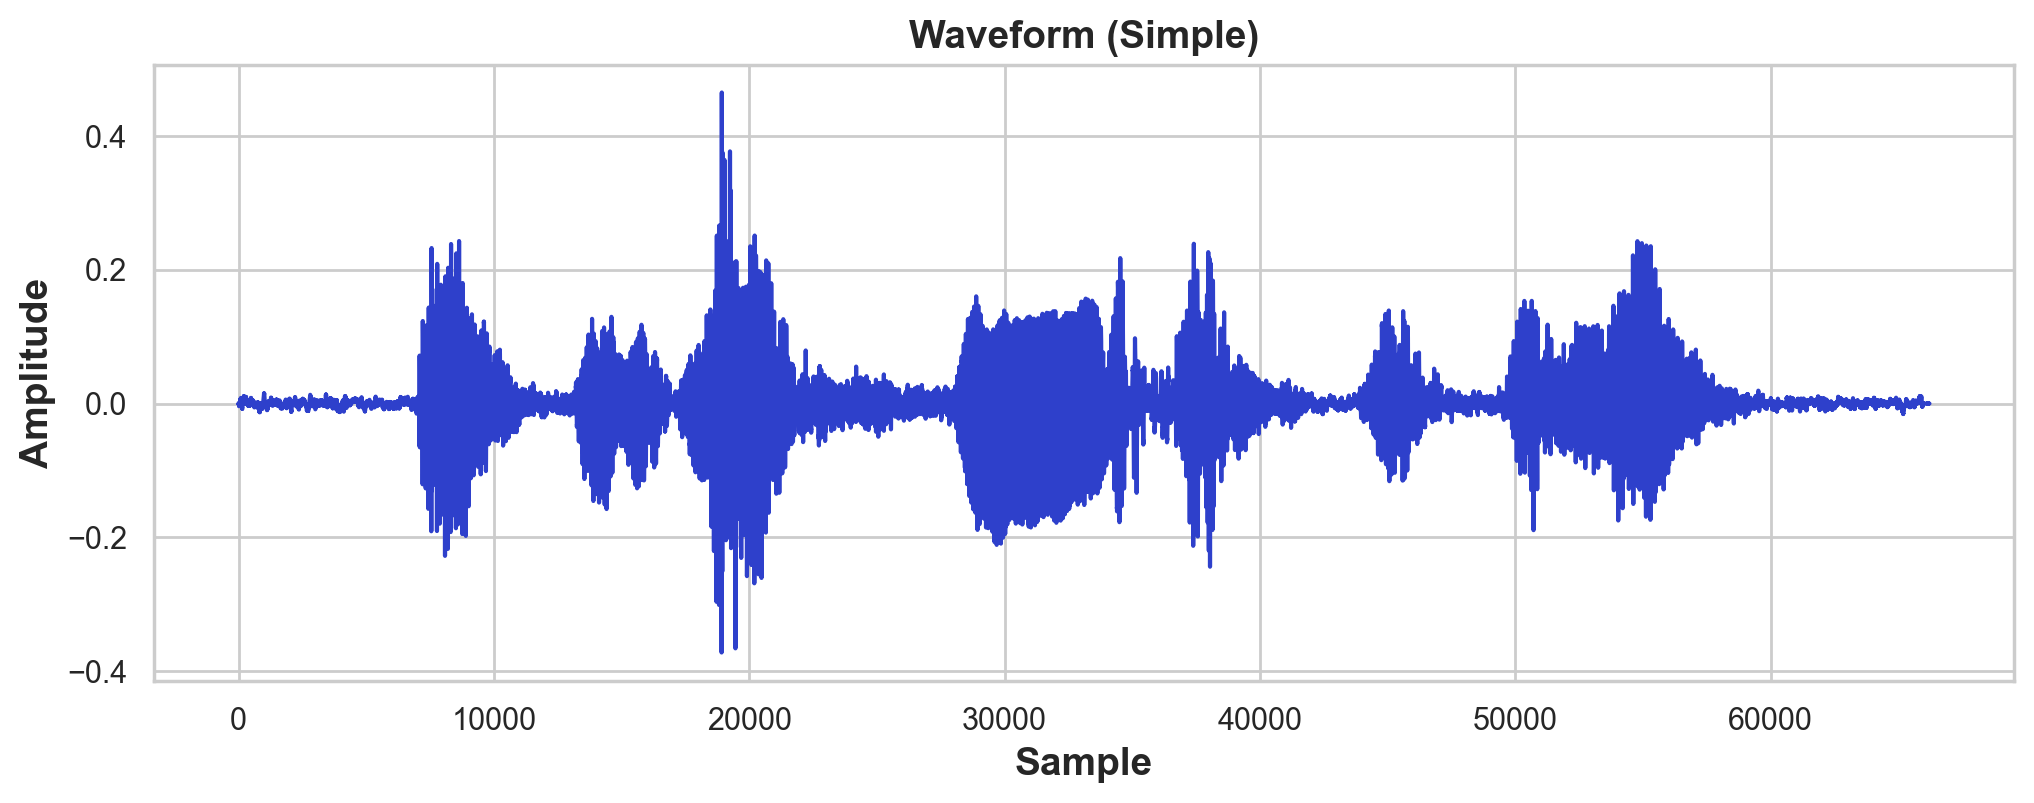

In [ ]:
Simple_data = data
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(Simple_data ,color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform (Simple)', fontdict= font2)
plt.show()

Audio(Simple_data, rate=sample_rate)

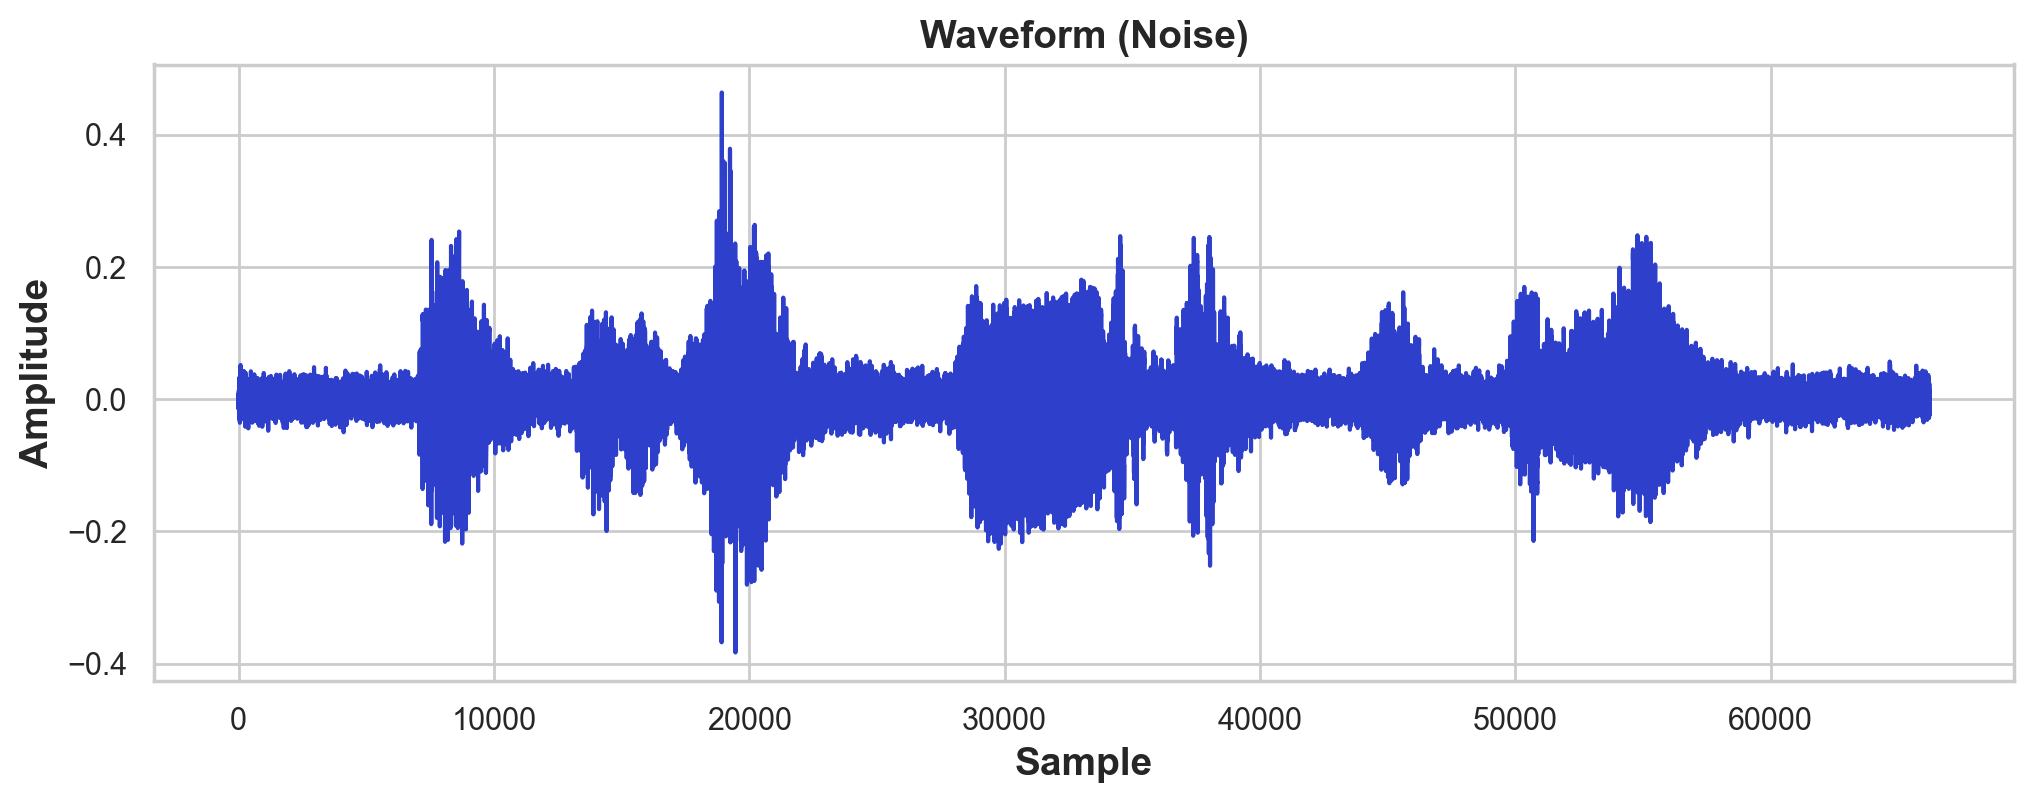

In [ ]:
Noise_data = noise(data)
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(Noise_data ,color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform (Noise)', fontdict= font2)
plt.show()

Audio(Noise_data, rate=sample_rate)

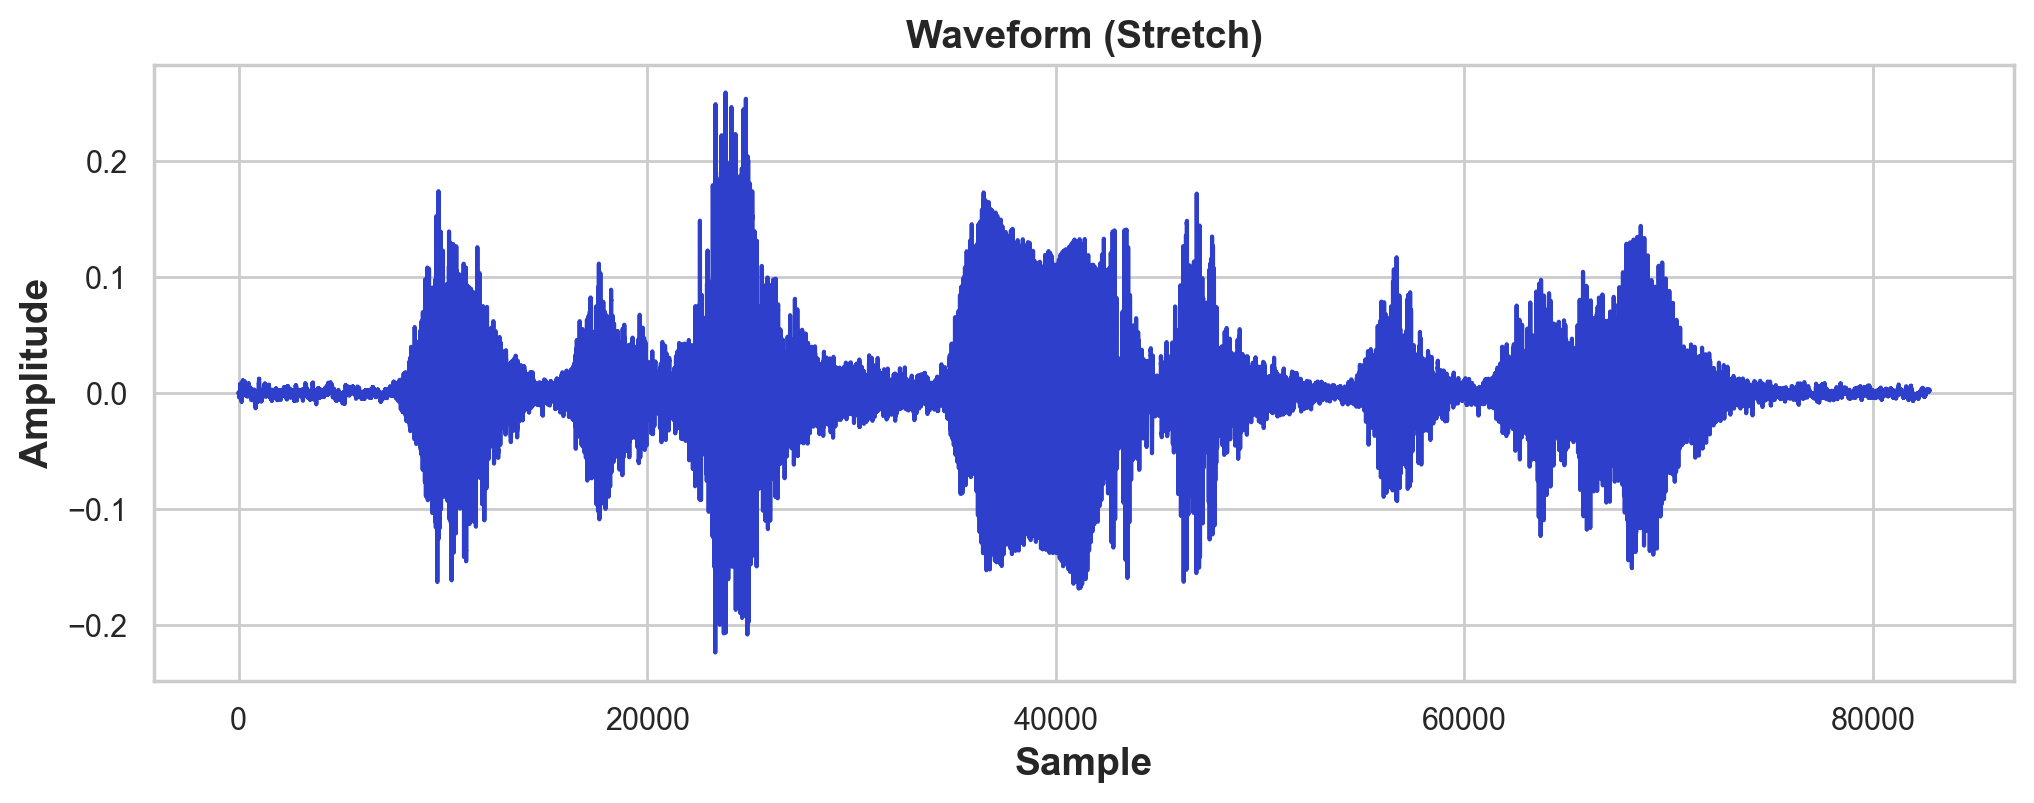

In [ ]:
Stretch_data = stretch(data)
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(Stretch_data ,color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform (Stretch)', fontdict= font2)
plt.show()

Audio(Stretch_data, rate=sample_rate)

* **[Table of Content](#0)**

<a id="5"></a>
# <p style="padding:10px;background-color:#0C4C79 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data PreParation </p>


<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **1- Only Crema**

  - In this project, I'm going to consider **Crema** dataset only.


In [ ]:
Crema_df

Emotions                                               Path
0       angry  /Users/chinmaychaudhari/Desktop/Hack2skill/mod...
1       angry  /Users/chinmaychaudhari/Desktop/Hack2skill/mod...
2     neutral  /Users/chinmaychaudhari/Desktop/Hack2skill/mod...
3     neutral  /Users/chinmaychaudhari/Desktop/Hack2skill/mod...
4     disgust  /Users/chinmaychaudhari/Desktop/Hack2skill/mod...
...       ...                                                ...
7437    angry  /Users/chinmaychaudhari/Desktop/Hack2skill/mod...
7438    angry  /Users/chinmaychaudhari/Desktop/Hack2skill/mod...
7439    angry  /Users/chinmaychaudhari/Desktop/Hack2skill/mod...
7440    angry  /Users/chinmaychaudhari/Desktop/Hack2skill/mod...
7441  neutral  /Users/chinmaychaudhari/Desktop/Hack2skill/mod...

[7442 rows x 2 columns]

* **[Table of Content](#0)**

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **2- Extract mfcc**

  - Mel-frequency cepstral coefficients (MFCC) are a feature extraction technique widely used in speech and audio processing.


In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration = 3, offset = 0.5)
    mfcc = np.mean(librosa.feature.mfcc(y = y, sr = sr, n_mfcc = 40).T, axis = 0)
    return mfcc

In [ ]:
extract_mfcc(Crema_df['Path'][0])

array([-2.5306090e+02,  1.0977661e+02, -3.0899892e+00,  4.8658745e+01,
       -9.5085611e+00, -1.2124889e+00, -1.9492447e+01,  2.6149992e-03,
       -1.5693570e+01, -1.9413183e+00, -8.3061552e+00, -3.6464510e+00,
        5.3349938e+00, -9.1106129e+00,  4.9668241e+00, -8.3655691e+00,
       -1.9263622e+00, -6.5914292e+00, -2.1274281e+00, -8.7410975e+00,
       -5.3866138e+00, -2.8523767e+00, -1.1824834e+01,  9.3823642e-01,
       -4.1533819e-01,  1.3292232e+00,  6.9874930e-01,  3.1621966e+00,
       -3.3734818e+00,  6.3364136e-01, -5.1586431e-01, -2.7933881e+00,
        3.5237288e+00,  3.8256082e-01,  3.2019200e+00,  1.2395662e+00,
        2.9361928e+00,  3.8238850e+00,  5.3017554e+00,  1.1654550e+00],
      dtype=float32)

In [ ]:
%%time
X_mfcc = Crema_df['Path'].apply(lambda x: extract_mfcc(x))

CPU times: user 18.7 s, sys: 1.75 s, total: 20.4 s
Wall time: 26.7 s


* **[Table of Content](#0)**

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **3- Array and Dimention**

  - In speech recognition, the concept of expanding dimensions typically refers to increasing the feature space of input data. Array, speech signals are continuous waveforms.


In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(7442, 40)

In [ ]:
## input split
X = np.expand_dims(X, -1)
X.shape

(7442, 40, 1)

In [ ]:
enc = OneHotEncoder()
y = enc.fit_transform(Crema_df[['Emotions']])

In [ ]:
y = y.toarray()

In [ ]:
# Assuming 'Emotions' column contains the labels
labels = Crema_df['Emotions'].values

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Define the emotion mapping
emotion_mapping = {
    'disgust': 0,
    'happy': 1,
    'sad': 2,
    'fear': 3,
    'angry': 4,
    'neutral': 5
}

# Map emotions to integers
y_encoded = np.array([emotion_mapping[emotion] for emotion in labels])

In [ ]:
from tensorflow.keras.utils import to_categorical

# Number of emotion classes
num_classes = len(emotion_mapping)

# Convert integer labels to one-hot encoding
y = to_categorical(y_encoded, num_classes=num_classes)
print(y.shape)  # Should be (number of samples, num_classes)

(7442, 6)


In [ ]:
print(X.shape)  # Should be (number of samples, 40, 1)
print(y.shape)  # Should be (number of samples, num_classes)

(7442, 40, 1)
(7442, 6)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(5953, 40, 1) (5953, 6)
(1489, 40, 1) (1489, 6)


* **[Table of Content](#0)**

<a id="6"></a>
# <p style="padding:10px;background-color:#0C4C79 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">LSTM Model </p>


<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **1- Structure of Model**

  - You can see the structure of LSTM in the cell below. Categorical_crossentropy for loss evaluation, ADAM as optimizer, validation split = 0.2 all of the Crema dataset, number of epochs = 500 and batchsize is 64.

In [ ]:
model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(6, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
print(Iterable)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,734 (1.17 MB)

 Trainable params: 305,734 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

<class 'collections.abc.Iterable'>


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
import tensorflow as tf

# Define the path where the best model will be saved
checkpoint_filepath = 'best_model.keras'

# Define the ModelCheckpoint callback to save the best model based on validation accuracy
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,          # Save only the best model (based on validation accuracy)
    monitor='val_accuracy',      # Monitor validation accuracy
    mode='max',                   # We want the maximum value of validation accuracy
    verbose=1                     # Print a message when saving the model
)

# Define the Learning Rate Scheduler function
def scheduler(epoch, lr):
    if epoch < 10:
        return lr  # Keep the learning rate unchanged for the first 10 epochs
    else:
        return lr * tf.math.exp(-0.1)  # Exponentially decay the learning rate after epoch 10

# Create the LearningRateScheduler callback
lr_scheduler_callback = LearningRateScheduler(scheduler)

# Train the model and use the callbacks
history = model.fit(
    X, y,
    validation_split=0.2,  # Use 20% of the data for validation
    epochs=50,            # Train for 500 epochs
    batch_size=64,         # Use a batch size of 64
    callbacks=[model_checkpoint_callback, lr_scheduler_callback]  # Add callbacks for checkpoint and learning rate scheduler
)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.8756 - loss: 0.3225
Epoch 1: val_accuracy improved from -inf to 0.41101, saving model to best_model.keras
94/94 ━━━━━━━━━━━━━━━━━━━━ 16s 170ms/step - accuracy: 0.8756 - loss: 0.3227 - val_accuracy: 0.4110 - val_loss: 3.3646 - learning_rate: 0.0010


* **[Table of Content](#0)**

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **2- Evaluation**

  - The accuracy and loss of model can be seen in the cells below.

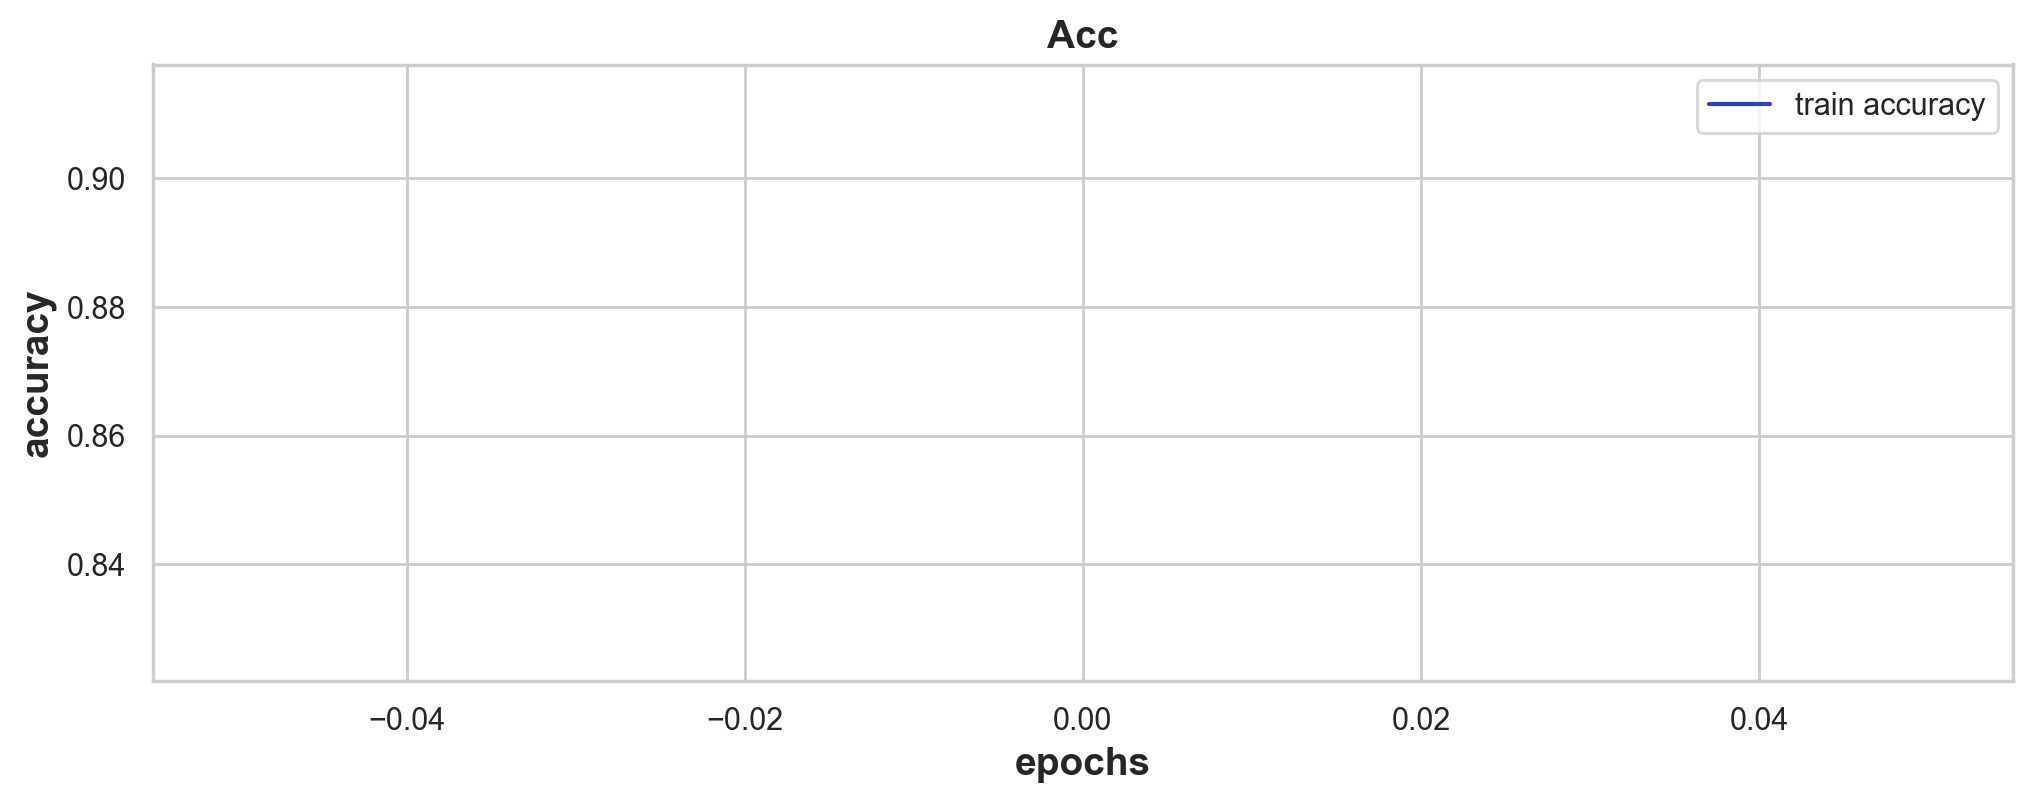

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(epochs, acc, label='train accuracy', color='#2E40CB')
plt.xlabel('epochs', fontdict= font2)
plt.ylabel('accuracy', fontdict= font2)
plt.title('Acc', fontdict= font2)
plt.legend()
plt.show()

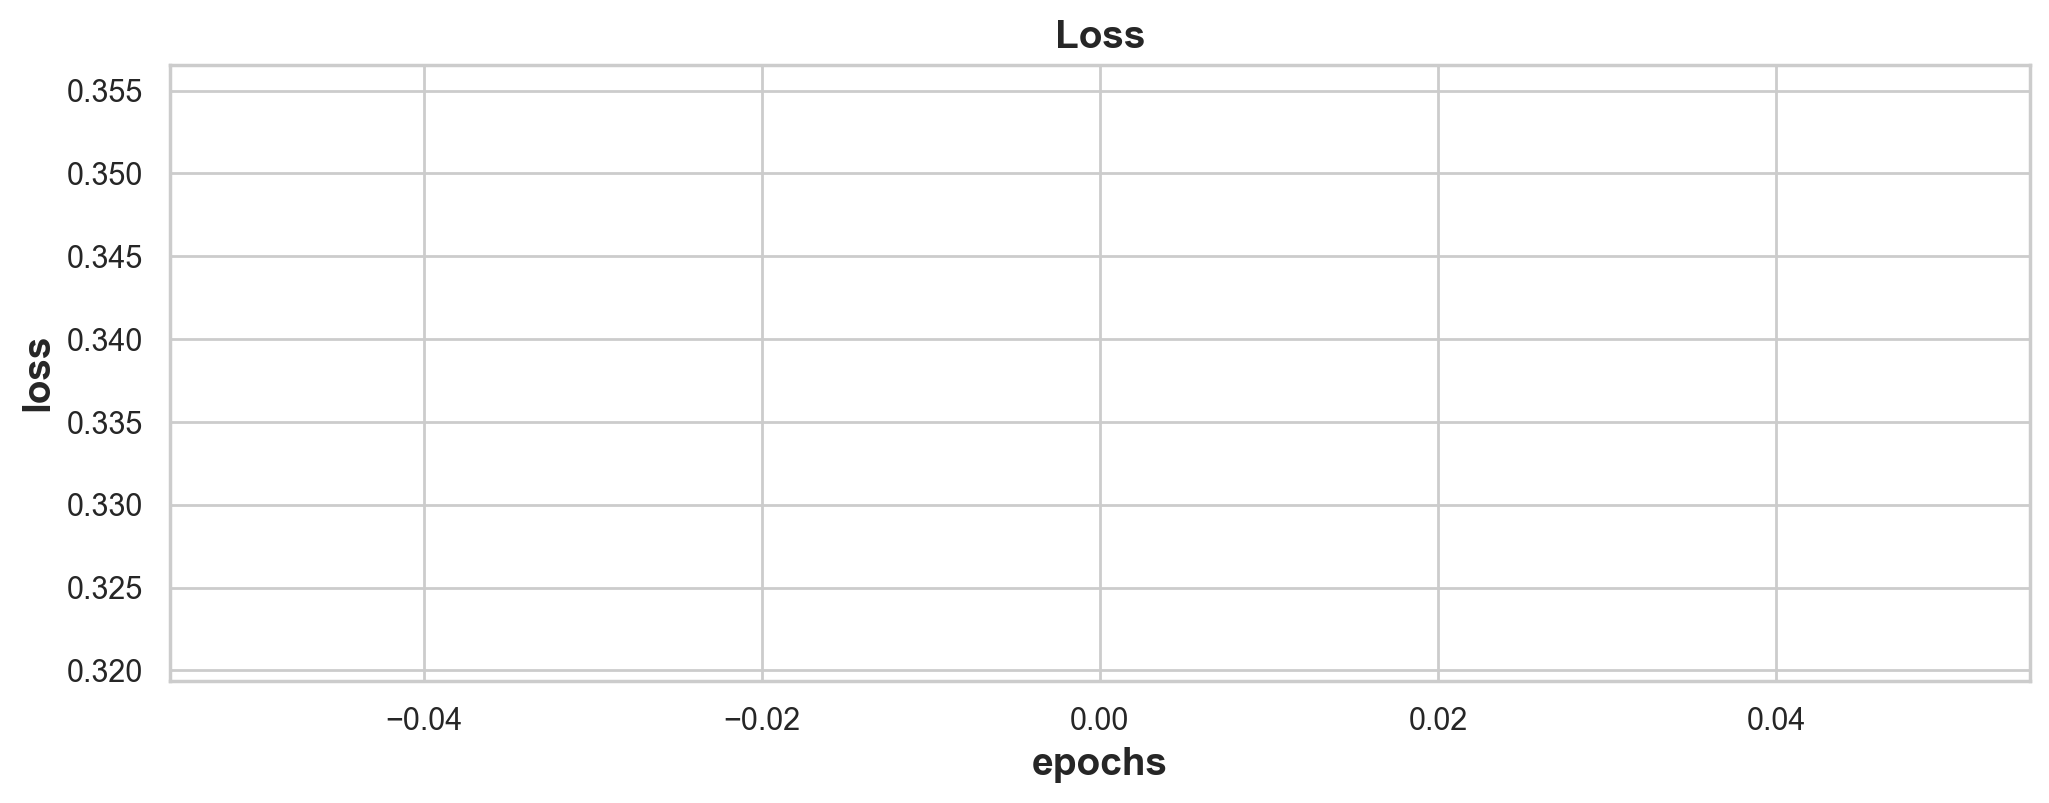

In [ ]:
loss = history.history['loss']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(epochs, loss, label='train loss', color='#2E40CB')
plt.xlabel('epochs', fontdict= font2)
plt.ylabel('loss', fontdict= font2)
plt.title('Loss', fontdict= font2)
plt.show()

* **[Table of Content](#0)**

47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step


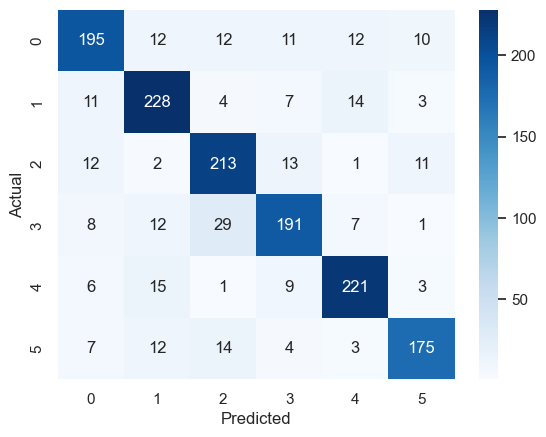

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Classification Report (CREMA-Only):
              precision    recall  f1-score   support

     Neutral       0.82      0.77      0.79       252
       Happy       0.81      0.85      0.83       267
         Sad       0.78      0.85      0.81       252
       Angry       0.81      0.77      0.79       248
        Fear       0.86      0.87      0.86       255
     Disgust       0.86      0.81      0.84       215

    accuracy                           0.82      1489
   macro avg       0.82      0.82      0.82      1489
weighted avg       0.82      0.82      0.82      1489



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

from sklearn.metrics import classification_report
import numpy as np

# Generate predictions on the validation set
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
y_true = np.argmax(y_val, axis=1)  # Convert one-hot encoded labels to class labels

# Define class names for the CREMA-only dataset
target_names = ['Neutral', 'Happy', 'Sad', 'Angry', 'Fear', 'Disgust']

# Calculate precision, recall, and F1-score for each class
report = classification_report(y_true, y_pred_classes, target_names=target_names)
print("Classification Report (CREMA-Only):")
print(report)
